In [1]:
!pip install jupyterlab pandas numpy scikit-learn xgboost matplotlib seaborn

  Using cached fqdn-1.5.1-py3-none-any.whl.metadata (1.4 kB)
  Using cached isoduration-20.11.0-py3-none-any.whl.metadata (5.7 kB)
  Using cached uri_template-1.3.0-py3-none-any.whl.metadata (8.8 kB)
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   - -------------------------------------- 1.8/72.0 MB 12.6 MB/s eta 0:00:06
   -- ------------------------------------- 4.2/72.0 MB 12.0 MB/s eta 0:00:06
   --- ------------------------------------ 7.1/72.0 MB 12.5 MB/s eta 0:00:06
   ---- ----------------------------------- 8.9/72.0 MB 11.5 MB/s eta 0:00:06
   ------ --------------------------------- 11.3/72.0 MB 11.6 MB/s eta 0:00:06
   ------- -------------------------------- 14.2/72.0 MB 12.2 MB/s eta 0:00:05
   --------- ------------------------------ 17.0/72.0 MB 12.3 MB/s eta 0:00:05
   ---------- ----------------------------- 19.7/72.0 MB 12.5 MB/s eta 0:00:05
   ------------ --------------------------- 22.8/72.0 MB 12.8 MB/s eta 0:00:04
   -------------- -----


[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

# This works perfectly - pandas handles decompression automatically
admissions = pd.read_csv('data/raw/core/admissions.csv.gz')
patients = pd.read_csv('data/raw/core/patients.csv.gz')
diagnoses = pd.read_csv('data/raw/hosp/diagnoses_icd.csv.gz')
drgcodes = pd.read_csv('data/raw/hosp/drgcodes.csv.gz')

In [1]:
import os

# Check where the notebook is running from
print("Current working directory:", os.getcwd())

# List files in current directory
print("\nFiles in CURRENT directory:")
for file in os.listdir('.'):
    print(f"  {file}")

Current working directory: C:\Users\harsh\Desktop\Trifusion

Files in CURRENT directory:
  .ipynb_checkpoints
  admissions.csv.gz.gz
  data
  diagnoses_icd.csv.gz.gz
  drgcodes.csv.gz.gz
  d_icd_diagnoses.csv.gz.gz
  notebook1_dataloading.ipynb
  patients.csv.gz.gz


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set style for plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries loaded successfully!")

# ================================================
# PART 1: LOAD DATA - WITH CORRECT .gz.gz EXTENSION
# ================================================

print("\n" + "="*60)
print("LOADING DATA FROM COMPRESSED FILES")
print("="*60)

# Your files have DOUBLE .gz.gz extension!
print("\n1. Loading admissions...")
admissions = pd.read_csv('admissions.csv.gz.gz')
print(f"   ✓ Loaded {len(admissions):,} admissions")

print("2. Loading patients...")
patients = pd.read_csv('patients.csv.gz.gz')
print(f"   ✓ Loaded {len(patients):,} patients")

print("3. Loading diagnoses...")
diagnoses = pd.read_csv('diagnoses_icd.csv.gz.gz')
print(f"   ✓ Loaded {len(diagnoses):,} diagnosis records")

print("4. Loading DRG codes...")
drgcodes = pd.read_csv('drgcodes.csv.gz.gz')
print(f"   ✓ Loaded {len(drgcodes):,} DRG records")

print("5. Loading ICD diagnosis dictionary...")
d_icd_diagnoses = pd.read_csv('d_icd_diagnoses.csv.gz.gz')
print(f"   ✓ Loaded {len(d_icd_diagnoses):,} ICD definitions")

print("\n✓ All data loaded successfully!")

# ================================================
# PART 2: DATA QUALITY CHECKS
# ================================================

print("\n" + "="*60)
print("DATA QUALITY CHECKS")
print("="*60)

# Check shapes
print("\n1. Dataset Shapes:")
print(f"   Admissions: {admissions.shape}")
print(f"   Patients: {patients.shape}")
print(f"   Diagnoses: {diagnoses.shape}")
print(f"   DRG Codes: {drgcodes.shape}")
print(f"   ICD Dictionary: {d_icd_diagnoses.shape}")

# Check for missing values
print("\n2. Missing Values in Admissions:")
missing_adm = admissions.isnull().sum()
print(missing_adm[missing_adm > 0] if missing_adm.sum() > 0 else "   No missing values")

print("\n3. Key columns check:")
print(f"   hospital_expire_flag exists: {'hospital_expire_flag' in admissions.columns}")
print(f"   hadm_id exists: {'hadm_id' in admissions.columns}")
print(f"   subject_id exists: {'subject_id' in admissions.columns}")

print("\n✓ Initial checks complete!")

Libraries loaded successfully!

LOADING DATA FROM COMPRESSED FILES

1. Loading admissions...
   ✓ Loaded 546,028 admissions
2. Loading patients...
   ✓ Loaded 364,627 patients
3. Loading diagnoses...
   ✓ Loaded 6,364,488 diagnosis records
4. Loading DRG codes...
   ✓ Loaded 761,856 DRG records
5. Loading ICD diagnosis dictionary...
   ✓ Loaded 112,107 ICD definitions

✓ All data loaded successfully!

DATA QUALITY CHECKS

1. Dataset Shapes:
   Admissions: (546028, 16)
   Patients: (364627, 6)
   Diagnoses: (6364488, 5)
   DRG Codes: (761856, 7)
   ICD Dictionary: (112107, 3)

2. Missing Values in Admissions:
deathtime             534238
admit_provider_id          4
admission_location         1
discharge_location    149818
insurance               9355
language                 775
marital_status         13619
edregtime             166788
edouttime             166788
dtype: int64

3. Key columns check:
   hospital_expire_flag exists: True
   hadm_id exists: True
   subject_id exists: True


PREPROCESSING: DATES & LENGTH OF STAY

1. Converting date columns...
2. Computing length of stay (LOS)...
   Mean LOS: 4.76 days
   Median LOS: 2.82 days
   Max LOS: 515.56 days

3. Cleaning ICD codes...

4. Cleaning DRG codes...

✓ Preprocessing complete!

EXPLORATORY STATISTICS

1. OUTCOME DISTRIBUTION:
   Total admissions: 546,028
   Deaths: 11,801 (2.16%)
   Survivals: 534,227 (97.84%)

2. AGE DISTRIBUTION:
   Mean age: 56.9 years
   Median age: 58.0 years
   Age range: 18 - 91 years

3. DIAGNOSIS STATISTICS:
   Total unique admissions with diagnoses: 545,497
   Mean diagnoses per admission: 11.67
   Median diagnoses per admission: 10
   Max diagnoses per admission: 57

   Total unique ICD codes: 28,562
   ICD-9 codes: 2,908,741
   ICD-10 codes: 3,455,747

4. DRG SEVERITY DISTRIBUTION:
drg_severity
1.0     66858
2.0    126182
3.0    123130
4.0     50761
Name: count, dtype: int64

✓ Statistics computed!

CREATING VISUALIZATIONS

✓ Visualization saved as '01_exploratory_analysis.png

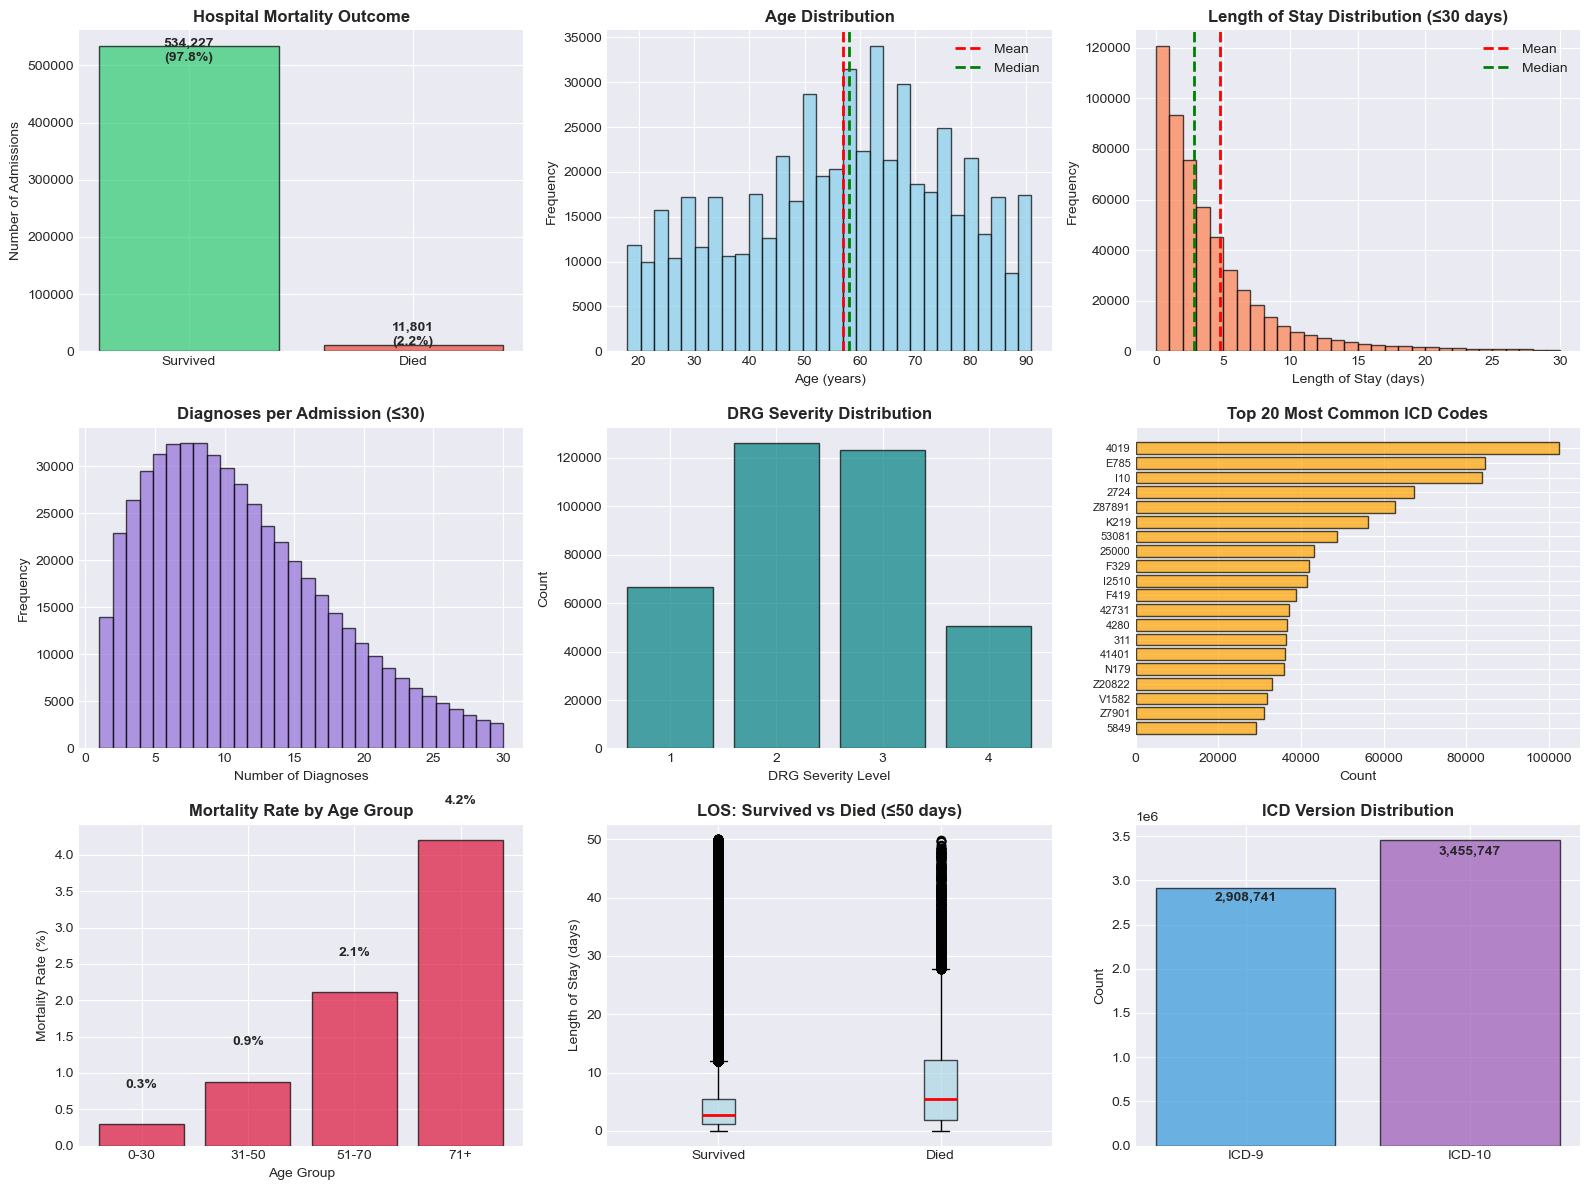


MERGING TABLES & SAVING PROCESSED DATA

1. Merging admissions with patients...
   ✓ Merged shape: (546028, 20)

2. Saving merged dataset...
   ✓ Saved as 'merged_admissions_patients.csv'

3. Saving cleaned diagnoses...
   ✓ Saved as 'diagnoses_cleaned.csv'

4. Saving cleaned DRG codes...
   ✓ Saved as 'drgcodes_cleaned.csv'

NOTEBOOK 01 COMPLETE!

📊 Key Findings:
   • 546,028 admissions analyzed
   • 2.16% mortality rate
   • Mean age: 56.9 years
   • Mean LOS: 4.76 days

✅ Ready for Notebook 02: Empirical Risk Calculation


In [5]:
# ================================================
# PART 3: PREPROCESS DATES & COMPUTE LOS
# ================================================

print("\n" + "="*60)
print("PREPROCESSING: DATES & LENGTH OF STAY")
print("="*60)

# Convert to datetime
print("\n1. Converting date columns...")
admissions['admittime'] = pd.to_datetime(admissions['admittime'])
admissions['dischtime'] = pd.to_datetime(admissions['dischtime'])
admissions['deathtime'] = pd.to_datetime(admissions['deathtime'])
admissions['edregtime'] = pd.to_datetime(admissions['edregtime'])
admissions['edouttime'] = pd.to_datetime(admissions['edouttime'])

# Compute Length of Stay
print("2. Computing length of stay (LOS)...")
admissions['los_days'] = (admissions['dischtime'] - admissions['admittime']) / timedelta(days=1)
admissions['los_days'] = admissions['los_days'].clip(lower=0)  # Fix any negatives

print(f"   Mean LOS: {admissions['los_days'].mean():.2f} days")
print(f"   Median LOS: {admissions['los_days'].median():.2f} days")
print(f"   Max LOS: {admissions['los_days'].max():.2f} days")

# Clean ICD codes (remove whitespace)
print("\n3. Cleaning ICD codes...")
diagnoses['icd_code'] = diagnoses['icd_code'].str.strip()
diagnoses['icd_version'] = diagnoses['icd_version'].astype(int)

# Clean DRG codes
print("\n4. Cleaning DRG codes...")
drgcodes['drg_severity'] = drgcodes['drg_severity'].clip(1, 4)  # Ensure 1-4
drgcodes['drg_mortality'] = drgcodes['drg_mortality'].clip(1, 4)

print("\n✓ Preprocessing complete!")

# ================================================
# PART 4: EXPLORATORY STATISTICS
# ================================================

print("\n" + "="*60)
print("EXPLORATORY STATISTICS")
print("="*60)

# Outcome distribution
print("\n1. OUTCOME DISTRIBUTION:")
print(f"   Total admissions: {len(admissions):,}")
deaths = admissions['hospital_expire_flag'].sum()
death_rate = deaths / len(admissions) * 100
print(f"   Deaths: {deaths:,} ({death_rate:.2f}%)")
print(f"   Survivals: {len(admissions) - deaths:,} ({100-death_rate:.2f}%)")

# Age distribution
print("\n2. AGE DISTRIBUTION:")
merged_temp = admissions.merge(patients[['subject_id', 'anchor_age']], on='subject_id')
print(f"   Mean age: {merged_temp['anchor_age'].mean():.1f} years")
print(f"   Median age: {merged_temp['anchor_age'].median():.1f} years")
print(f"   Age range: {merged_temp['anchor_age'].min():.0f} - {merged_temp['anchor_age'].max():.0f} years")

# Diagnosis statistics
print("\n3. DIAGNOSIS STATISTICS:")
diag_per_admission = diagnoses.groupby('hadm_id').size()
print(f"   Total unique admissions with diagnoses: {len(diag_per_admission):,}")
print(f"   Mean diagnoses per admission: {diag_per_admission.mean():.2f}")
print(f"   Median diagnoses per admission: {diag_per_admission.median():.0f}")
print(f"   Max diagnoses per admission: {diag_per_admission.max():.0f}")

print(f"\n   Total unique ICD codes: {diagnoses['icd_code'].nunique():,}")
print(f"   ICD-9 codes: {(diagnoses['icd_version'] == 9).sum():,}")
print(f"   ICD-10 codes: {(diagnoses['icd_version'] == 10).sum():,}")

# DRG statistics
print("\n4. DRG SEVERITY DISTRIBUTION:")
print(drgcodes['drg_severity'].value_counts().sort_index())

print("\n✓ Statistics computed!")

# ================================================
# PART 5: VISUALIZATIONS
# ================================================

print("\n" + "="*60)
print("CREATING VISUALIZATIONS")
print("="*60)

fig = plt.figure(figsize=(16, 12))

# 1. Outcome distribution
ax1 = plt.subplot(3, 3, 1)
outcome_counts = admissions['hospital_expire_flag'].value_counts()
colors = ['#2ecc71', '#e74c3c']
ax1.bar(['Survived', 'Died'], outcome_counts.values, color=colors, alpha=0.7, edgecolor='black')
ax1.set_ylabel('Number of Admissions')
ax1.set_title('Hospital Mortality Outcome', fontweight='bold', fontsize=12)
ax1.text(0, outcome_counts[0]*0.95, f'{outcome_counts[0]:,}\n({100-death_rate:.1f}%)', 
         ha='center', fontsize=10, fontweight='bold')
ax1.text(1, outcome_counts[1]*0.95, f'{outcome_counts[1]:,}\n({death_rate:.1f}%)', 
         ha='center', fontsize=10, fontweight='bold')

# 2. Age distribution
ax2 = plt.subplot(3, 3, 2)
merged_temp['anchor_age'].hist(bins=30, ax=ax2, color='skyblue', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Age (years)')
ax2.set_ylabel('Frequency')
ax2.set_title('Age Distribution', fontweight='bold', fontsize=12)
ax2.axvline(merged_temp['anchor_age'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
ax2.axvline(merged_temp['anchor_age'].median(), color='green', linestyle='--', linewidth=2, label='Median')
ax2.legend()

# 3. Length of Stay distribution
ax3 = plt.subplot(3, 3, 3)
los_subset = admissions[admissions['los_days'] <= 30]['los_days']  # Cap at 30 for visualization
ax3.hist(los_subset, bins=30, color='coral', edgecolor='black', alpha=0.7)
ax3.set_xlabel('Length of Stay (days)')
ax3.set_ylabel('Frequency')
ax3.set_title('Length of Stay Distribution (≤30 days)', fontweight='bold', fontsize=12)
ax3.axvline(admissions['los_days'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
ax3.axvline(admissions['los_days'].median(), color='green', linestyle='--', linewidth=2, label='Median')
ax3.legend()

# 4. Diagnoses per admission
ax4 = plt.subplot(3, 3, 4)
diag_per_admission[diag_per_admission <= 30].hist(bins=30, ax=ax4, color='mediumpurple', 
                                                    edgecolor='black', alpha=0.7)
ax4.set_xlabel('Number of Diagnoses')
ax4.set_ylabel('Frequency')
ax4.set_title('Diagnoses per Admission (≤30)', fontweight='bold', fontsize=12)

# 5. DRG Severity distribution
ax5 = plt.subplot(3, 3, 5)
drg_counts = drgcodes['drg_severity'].value_counts().sort_index()
ax5.bar(drg_counts.index, drg_counts.values, color='teal', alpha=0.7, edgecolor='black')
ax5.set_xlabel('DRG Severity Level')
ax5.set_ylabel('Count')
ax5.set_title('DRG Severity Distribution', fontweight='bold', fontsize=12)
ax5.set_xticks([1, 2, 3, 4])

# 6. Top 20 most common diagnoses
ax6 = plt.subplot(3, 3, 6)
top_diag = diagnoses['icd_code'].value_counts().head(20)
ax6.barh(range(len(top_diag)), top_diag.values, color='orange', alpha=0.7, edgecolor='black')
ax6.set_yticks(range(len(top_diag)))
ax6.set_yticklabels(top_diag.index, fontsize=8)
ax6.set_xlabel('Count')
ax6.set_title('Top 20 Most Common ICD Codes', fontweight='bold', fontsize=12)
ax6.invert_yaxis()

# 7. Mortality by age group
ax7 = plt.subplot(3, 3, 7)
merged_temp['age_group'] = pd.cut(merged_temp['anchor_age'], 
                                   bins=[0, 30, 50, 70, 120], 
                                   labels=['0-30', '31-50', '51-70', '71+'])
mortality_by_age = merged_temp.groupby('age_group')['hospital_expire_flag'].agg(['mean', 'count'])
ax7.bar(range(len(mortality_by_age)), mortality_by_age['mean']*100, 
        color='crimson', alpha=0.7, edgecolor='black')
ax7.set_xticks(range(len(mortality_by_age)))
ax7.set_xticklabels(mortality_by_age.index)
ax7.set_ylabel('Mortality Rate (%)')
ax7.set_xlabel('Age Group')
ax7.set_title('Mortality Rate by Age Group', fontweight='bold', fontsize=12)
for i, v in enumerate(mortality_by_age['mean']*100):
    ax7.text(i, v+0.5, f'{v:.1f}%', ha='center', fontweight='bold')

# 8. LOS: Died vs Survived
ax8 = plt.subplot(3, 3, 8)
died_los = admissions[admissions['hospital_expire_flag']==1]['los_days']
survived_los = admissions[admissions['hospital_expire_flag']==0]['los_days']
ax8.boxplot([survived_los[survived_los<=50], died_los[died_los<=50]], 
            labels=['Survived', 'Died'], patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7),
            medianprops=dict(color='red', linewidth=2))
ax8.set_ylabel('Length of Stay (days)')
ax8.set_title('LOS: Survived vs Died (≤50 days)', fontweight='bold', fontsize=12)

# 9. ICD version distribution
ax9 = plt.subplot(3, 3, 9)
icd_version_counts = diagnoses['icd_version'].value_counts().sort_index()
ax9.bar(['ICD-9', 'ICD-10'], icd_version_counts.values, 
        color=['#3498db', '#9b59b6'], alpha=0.7, edgecolor='black')
ax9.set_ylabel('Count')
ax9.set_title('ICD Version Distribution', fontweight='bold', fontsize=12)
for i, v in enumerate(icd_version_counts.values):
    ax9.text(i, v*0.95, f'{v:,}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('01_exploratory_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualization saved as '01_exploratory_analysis.png'")
plt.show()

# ================================================
# PART 6: MERGE & SAVE PROCESSED DATA
# ================================================

print("\n" + "="*60)
print("MERGING TABLES & SAVING PROCESSED DATA")
print("="*60)

# Merge admissions with patients
print("\n1. Merging admissions with patients...")
merged_data = admissions.merge(
    patients[['subject_id', 'anchor_age', 'gender', 'dod']], 
    on='subject_id', 
    how='left'
)
print(f"   ✓ Merged shape: {merged_data.shape}")

# Save processed data
print("\n2. Saving merged dataset...")
merged_data.to_csv('merged_admissions_patients.csv', index=False)
print("   ✓ Saved as 'merged_admissions_patients.csv'")

# Save diagnoses (already cleaned)
print("\n3. Saving cleaned diagnoses...")
diagnoses.to_csv('diagnoses_cleaned.csv', index=False)
print("   ✓ Saved as 'diagnoses_cleaned.csv'")

# Save DRG codes (already cleaned)
print("\n4. Saving cleaned DRG codes...")
drgcodes.to_csv('drgcodes_cleaned.csv', index=False)
print("   ✓ Saved as 'drgcodes_cleaned.csv'")

print("\n" + "="*60)
print("NOTEBOOK 01 COMPLETE!")
print("="*60)
print("\n📊 Key Findings:")
print(f"   • {len(admissions):,} admissions analyzed")
print(f"   • {death_rate:.2f}% mortality rate")
print(f"   • Mean age: {merged_temp['anchor_age'].mean():.1f} years")
print(f"   • Mean LOS: {admissions['los_days'].mean():.2f} days")
print(f"\n✅ Ready for Notebook 02: Empirical Risk Calculation")

NOTEBOOK 02: EMPIRICAL RISK CALCULATION

Libraries loaded successfully!

LOADING PROCESSED DATA
✓ Admissions: (546028, 20)
✓ Diagnoses: (6364488, 5)
✓ DRG codes: (761856, 7)

CALCULATING VARIABLE X: Total Diagnosis Counts

✓ Calculated X for 28,562 unique ICD codes
  Range: 1 to 102368
  Mean: 222.83
  Median: 7

Top 10 most common diagnoses:
icd_code      X
    4019 102368
    E785  84570
     I10  83775
    2724  67293
  Z87891  62806
    K219  56157
   53081  48628
   25000  43077
    F329  41876
   I2510  41550

CALCULATING VARIABLE Y: Death-Linked Diagnosis Counts

✓ Calculated Y for 9,022 unique ICD codes in deaths
  Range: 1 to 4780
  Mean: 29.09

Top 10 diagnoses in deaths:
icd_code    Y
     Z66 4780
    Z515 4618
   J9601 2439
    N179 2424
    E785 2418
    E872 2403
    4019 2192
   51881 2172
   V4986 2163
   R6521 1994

CALCULATING DIAGNOSIS RISK: Y/X

✓ Calculated risk for 28,562 diagnoses
  Diagnoses with X >= 10: 12,842
  Diagnoses with X < 10 (excluded): 15,720

Risk 

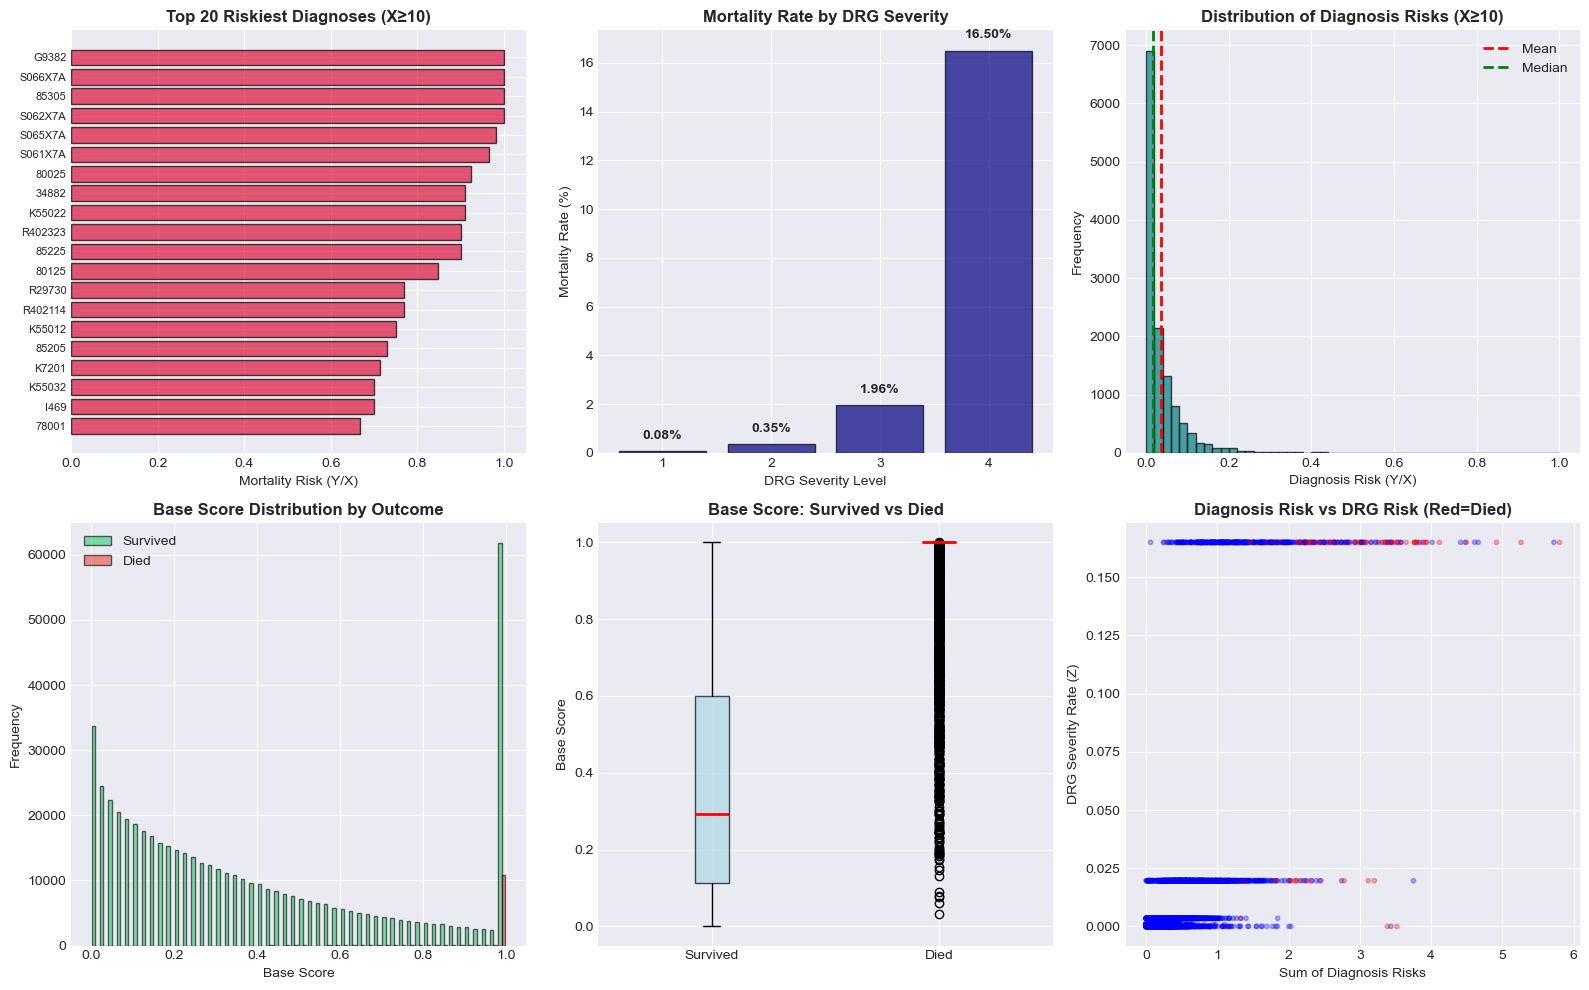


VALIDATION: Checking Base Score Predictive Power

✓ Base Score AUROC: 0.9307

Performance at different thresholds:
Threshold    Sensitivity     Specificity     Accuracy    
------------------------------------------------------------
0.10         0.9996          0.2260          0.2427      
0.20         0.9984          0.3835          0.3967      
0.30         0.9960          0.5099          0.5204      
0.40         0.9926          0.6103          0.6186      
0.50         0.9865          0.6891          0.6955      

SUMMARY REPORT

EMPIRICAL RISK CALCULATION SUMMARY

Variable X (Total Diagnosis Counts):
  - Unique ICD codes: 28,562
  - Range: 1 to 102368
  - Reliable diagnoses (X≥10): 12,842

Variable Y (Death-Linked Counts):
  - ICD codes in deaths: 9,022
  - Top risky diagnosis: G9382 (risk=1.0000)

Diagnosis Risk (Y/X):
  - Mean: 0.0366
  - Median: 0.0163
  - Range: 0.0000 to 1.0000

Variable Z (DRG Mortality Rates):
  - Level 1: 0.0008
  - Level 2: 0.0035
  - Level 3: 0.0196
  

In [8]:
# Notebook 02: Empirical Risk Calculation (Variables X, Y, Z)
# Trifusion: In-Hospital Mortality Risk Prediction
# ================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 60)
print("NOTEBOOK 02: EMPIRICAL RISK CALCULATION")
print("=" * 60)
print("\nLibraries loaded successfully!")

# ================================================
# PART 1: LOAD PROCESSED DATA
# ================================================
print("\n" + "=" * 60)
print("LOADING PROCESSED DATA")
print("=" * 60)

admissions = pd.read_csv('merged_admissions_patients.csv')
diagnoses = pd.read_csv('diagnoses_cleaned.csv')
drgcodes = pd.read_csv('drgcodes_cleaned.csv')

print(f"✓ Admissions: {admissions.shape}")
print(f"✓ Diagnoses: {diagnoses.shape}")
print(f"✓ DRG codes: {drgcodes.shape}")

# ================================================
# PART 2: CALCULATE VARIABLE X (Total Counts)
# ================================================
print("\n" + "=" * 60)
print("CALCULATING VARIABLE X: Total Diagnosis Counts")
print("=" * 60)

# Count total occurrences of each ICD code
diag_counts = diagnoses['icd_code'].value_counts().reset_index()
diag_counts.columns = ['icd_code', 'X']

print(f"\n✓ Calculated X for {len(diag_counts):,} unique ICD codes")
print(f"  Range: {diag_counts['X'].min()} to {diag_counts['X'].max()}")
print(f"  Mean: {diag_counts['X'].mean():.2f}")
print(f"  Median: {diag_counts['X'].median():.0f}")

print("\nTop 10 most common diagnoses:")
print(diag_counts.head(10).to_string(index=False))

# ================================================
# PART 3: CALCULATE VARIABLE Y (Death Counts)
# ================================================
print("\n" + "=" * 60)
print("CALCULATING VARIABLE Y: Death-Linked Diagnosis Counts")
print("=" * 60)

# Merge diagnoses with admissions to get death flag
diag_with_death = diagnoses.merge(
    admissions[['hadm_id', 'hospital_expire_flag']],
    on='hadm_id',
    how='left'
)

# Count diagnoses only in patients who died
death_diag = diag_with_death[diag_with_death['hospital_expire_flag'] == 1]
death_counts = death_diag['icd_code'].value_counts().reset_index()
death_counts.columns = ['icd_code', 'Y']

print(f"\n✓ Calculated Y for {len(death_counts):,} unique ICD codes in deaths")
print(f"  Range: {death_counts['Y'].min()} to {death_counts['Y'].max()}")
print(f"  Mean: {death_counts['Y'].mean():.2f}")

print("\nTop 10 diagnoses in deaths:")
print(death_counts.head(10).to_string(index=False))

# ================================================
# PART 4: CALCULATE DIAGNOSIS RISK (Y/X)
# ================================================
print("\n" + "=" * 60)
print("CALCULATING DIAGNOSIS RISK: Y/X")
print("=" * 60)

# Merge X and Y
diag_risks = diag_counts.merge(death_counts, on='icd_code', how='left')
diag_risks['Y'] = diag_risks['Y'].fillna(0)  # ICD codes not in deaths get Y=0

# Calculate risk, but only for diagnoses with X >= 10 (reliability threshold)
diag_risks['diag_risk'] = np.where(
    diag_risks['X'] >= 10,
    diag_risks['Y'] / diag_risks['X'],
    0  # Set risk to 0 for rare diagnoses
)

print(f"\n✓ Calculated risk for {len(diag_risks):,} diagnoses")
print(f"  Diagnoses with X >= 10: {(diag_risks['X'] >= 10).sum():,}")
print(f"  Diagnoses with X < 10 (excluded): {(diag_risks['X'] < 10).sum():,}")

print(f"\nRisk statistics (for X >= 10):")
reliable_risks = diag_risks[diag_risks['X'] >= 10]['diag_risk']
print(f"  Mean risk: {reliable_risks.mean():.4f}")
print(f"  Median risk: {reliable_risks.median():.4f}")
print(f"  Max risk: {reliable_risks.max():.4f}")
print(f"  Min risk: {reliable_risks.min():.4f}")

# Top 20 riskiest diagnoses
print("\nTop 20 riskiest diagnoses (X >= 10):")
top_risky = diag_risks[diag_risks['X'] >= 10].sort_values('diag_risk', ascending=False).head(20)
print(top_risky.to_string(index=False))

# Save diagnosis risks
diag_risks.to_csv('diagnosis_risks.csv', index=False)
print("\n✓ Saved as 'diagnosis_risks.csv'")

# ================================================
# PART 5: CALCULATE VARIABLE Z (DRG Mortality Rate)
# ================================================
print("\n" + "=" * 60)
print("CALCULATING VARIABLE Z: DRG Severity Mortality Rates")
print("=" * 60)

# Merge DRG with admissions
drg_with_death = drgcodes.merge(
    admissions[['hadm_id', 'hospital_expire_flag']],
    on='hadm_id',
    how='left'
)

# Calculate mortality rate per DRG severity level
drg_rates = drg_with_death.groupby('drg_severity').agg({
    'hospital_expire_flag': ['sum', 'count', 'mean']
}).reset_index()
drg_rates.columns = ['drg_severity', 'deaths', 'total', 'Z']

print("\nDRG Severity Mortality Rates:")
print(drg_rates.to_string(index=False))

# Save DRG rates
drg_rates[['drg_severity', 'Z']].to_csv('drg_severity_rates.csv', index=False)
print("\n✓ Saved as 'drg_severity_rates.csv'")

# ================================================
# PART 6: COMPUTE PER-HOSPITALIZATION BASE SCORE
# ================================================
print("\n" + "=" * 60)
print("COMPUTING BASE SCORES PER HOSPITALIZATION")
print("=" * 60)

# Step 1: Sum diagnosis risks per hospitalization
print("\n1. Summing diagnosis risks per hadm_id...")
hadm_diag_risks = diagnoses.merge(
    diag_risks[['icd_code', 'diag_risk']],
    on='icd_code',
    how='left'
)
hadm_diag_risks['diag_risk'] = hadm_diag_risks['diag_risk'].fillna(0)
hadm_sum_diag_risk = hadm_diag_risks.groupby('hadm_id')['diag_risk'].sum().reset_index()
hadm_sum_diag_risk.columns = ['hadm_id', 'sum_diag_risk']

print(f"  ✓ Computed for {len(hadm_sum_diag_risk):,} hospitalizations")
print(f"  Mean sum: {hadm_sum_diag_risk['sum_diag_risk'].mean():.4f}")
print(f"  Median sum: {hadm_sum_diag_risk['sum_diag_risk'].median():.4f}")

# Step 2: Get Z per hospitalization (use max severity if multiple DRGs)
print("\n2. Getting DRG severity rate per hadm_id...")
hadm_drg = drgcodes.groupby('hadm_id')['drg_severity'].max().reset_index()
hadm_drg = hadm_drg.merge(drg_rates[['drg_severity', 'Z']], on='drg_severity', how='left')
print(f"  ✓ Computed for {len(hadm_drg):,} hospitalizations")

# Step 3: Combine to create base score
print("\n3. Computing base score = sum_diag_risk + Z...")
hadm_scores = hadm_sum_diag_risk.merge(
    hadm_drg[['hadm_id', 'Z', 'drg_severity']],
    on='hadm_id',
    how='left'
)
hadm_scores['Z'] = hadm_scores['Z'].fillna(0)  # If no DRG, Z=0
hadm_scores['base_score'] = hadm_scores['sum_diag_risk'] + hadm_scores['Z']
hadm_scores['base_score'] = hadm_scores['base_score'].clip(0, 1)  # Normalize

# Merge with admissions to get outcome
hadm_scores = hadm_scores.merge(
    admissions[['hadm_id', 'subject_id', 'hospital_expire_flag']],
    on='hadm_id',
    how='left'
)

print(f"\n✓ Base scores computed for {len(hadm_scores):,} hospitalizations")
print(f"  Mean base score: {hadm_scores['base_score'].mean():.4f}")
print(f"  Median base score: {hadm_scores['base_score'].median():.4f}")
print(f"  Max base score: {hadm_scores['base_score'].max():.4f}")

# Compare scores between deaths and survivals
died_scores = hadm_scores[hadm_scores['hospital_expire_flag']==1]['base_score']
survived_scores = hadm_scores[hadm_scores['hospital_expire_flag']==0]['base_score']

print(f"\nBase score comparison:")
print(f"  Died - Mean: {died_scores.mean():.4f}, Median: {died_scores.median():.4f}")
print(f"  Survived - Mean: {survived_scores.mean():.4f}, Median: {survived_scores.median():.4f}")

# Save base scores
hadm_scores.to_csv('base_scores.csv', index=False)
print("\n✓ Saved as 'base_scores.csv'")

# ================================================
# PART 7: VISUALIZATIONS
# ================================================
print("\n" + "=" * 60)
print("CREATING VISUALIZATIONS")
print("=" * 60)

fig = plt.figure(figsize=(16, 10))

# 1. Top 20 riskiest diagnoses
ax1 = plt.subplot(2, 3, 1)
top_20 = diag_risks[diag_risks['X'] >= 10].sort_values('diag_risk', ascending=False).head(20)
y_pos = range(len(top_20))
ax1.barh(y_pos, top_20['diag_risk'], color='crimson', alpha=0.7, edgecolor='black')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(top_20['icd_code'], fontsize=8)
ax1.set_xlabel('Mortality Risk (Y/X)')
ax1.set_title('Top 20 Riskiest Diagnoses (X≥10)', fontweight='bold', fontsize=12)
ax1.invert_yaxis()

# 2. DRG severity vs mortality rate
ax2 = plt.subplot(2, 3, 2)
ax2.bar(drg_rates['drg_severity'], drg_rates['Z']*100,
        color='navy', alpha=0.7, edgecolor='black')
ax2.set_xlabel('DRG Severity Level')
ax2.set_ylabel('Mortality Rate (%)')
ax2.set_title('Mortality Rate by DRG Severity', fontweight='bold', fontsize=12)
ax2.set_xticks([1, 2, 3, 4])
for i, (sev, rate) in enumerate(zip(drg_rates['drg_severity'], drg_rates['Z']*100)):
    ax2.text(sev, rate+0.5, f'{rate:.2f}%', ha='center', fontweight='bold')

# 3. Distribution of diagnosis risks
ax3 = plt.subplot(2, 3, 3)
reliable_diag_risks = diag_risks[diag_risks['X'] >= 10]['diag_risk']
ax3.hist(reliable_diag_risks, bins=50, color='teal', alpha=0.7, edgecolor='black')
ax3.set_xlabel('Diagnosis Risk (Y/X)')
ax3.set_ylabel('Frequency')
ax3.set_title('Distribution of Diagnosis Risks (X≥10)', fontweight='bold', fontsize=12)
ax3.axvline(reliable_diag_risks.mean(), color='red', linestyle='--', linewidth=2, label='Mean')
ax3.axvline(reliable_diag_risks.median(), color='green', linestyle='--', linewidth=2, label='Median')
ax3.legend()

# 4. Base score distribution by outcome
ax4 = plt.subplot(2, 3, 4)
ax4.hist([survived_scores, died_scores], bins=50,
         label=['Survived', 'Died'],
         color=['#2ecc71', '#e74c3c'],
         alpha=0.6, edgecolor='black')
ax4.set_xlabel('Base Score')
ax4.set_ylabel('Frequency')
ax4.set_title('Base Score Distribution by Outcome', fontweight='bold', fontsize=12)
ax4.legend()

# 5. Base score boxplot
ax5 = plt.subplot(2, 3, 5)
ax5.boxplot([survived_scores, died_scores],
            labels=['Survived', 'Died'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7),
            medianprops=dict(color='red', linewidth=2))
ax5.set_ylabel('Base Score')
ax5.set_title('Base Score: Survived vs Died', fontweight='bold', fontsize=12)

# 6. Scatter: sum_diag_risk vs Z
ax6 = plt.subplot(2, 3, 6)
sample = hadm_scores.sample(min(5000, len(hadm_scores)))
colors = ['red' if x==1 else 'blue' for x in sample['hospital_expire_flag']]
ax6.scatter(sample['sum_diag_risk'], sample['Z'],
            c=colors, alpha=0.3, s=10)
ax6.set_xlabel('Sum of Diagnosis Risks')
ax6.set_ylabel('DRG Severity Rate (Z)')
ax6.set_title('Diagnosis Risk vs DRG Risk (Red=Died)', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig('02_empirical_risks.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualization saved as '02_empirical_risks.png'")
plt.show()

# ================================================
# PART 8: VALIDATION CHECK
# ================================================
print("\n" + "=" * 60)
print("VALIDATION: Checking Base Score Predictive Power")
print("=" * 60)

from sklearn.metrics import roc_auc_score, confusion_matrix

auc = roc_auc_score(hadm_scores['hospital_expire_flag'], hadm_scores['base_score'])
print(f"\n✓ Base Score AUROC: {auc:.4f}")

# Test different thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]
print("\nPerformance at different thresholds:")
print(f"{'Threshold':<12} {'Sensitivity':<15} {'Specificity':<15} {'Accuracy':<12}")
print("-" * 60)

for thresh in thresholds:
    y_true = hadm_scores['hospital_expire_flag']
    y_pred = (hadm_scores['base_score'] >= thresh).astype(int)
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    print(f"{thresh:<12.2f} {sensitivity:<15.4f} {specificity:<15.4f} {accuracy:<12.4f}")

# ================================================
# PART 9: SUMMARY REPORT
# ================================================
print("\n" + "=" * 60)
print("SUMMARY REPORT")
print("=" * 60)

summary = f"""
EMPIRICAL RISK CALCULATION SUMMARY
===================================

Variable X (Total Diagnosis Counts):
  - Unique ICD codes: {len(diag_counts):,}
  - Range: {diag_counts['X'].min()} to {diag_counts['X'].max()}
  - Reliable diagnoses (X≥10): {(diag_risks['X'] >= 10).sum():,}

Variable Y (Death-Linked Counts):
  - ICD codes in deaths: {len(death_counts):,}
  - Top risky diagnosis: {top_20.iloc[0]['icd_code']} (risk={top_20.iloc[0]['diag_risk']:.4f})

Diagnosis Risk (Y/X):
  - Mean: {reliable_risks.mean():.4f}
  - Median: {reliable_risks.median():.4f}
  - Range: {reliable_risks.min():.4f} to {reliable_risks.max():.4f}

Variable Z (DRG Mortality Rates):
  - Level 1: {drg_rates[drg_rates['drg_severity']==1]['Z'].values[0]:.4f}
  - Level 2: {drg_rates[drg_rates['drg_severity']==2]['Z'].values[0]:.4f}
  - Level 3: {drg_rates[drg_rates['drg_severity']==3]['Z'].values[0]:.4f}
  - Level 4: {drg_rates[drg_rates['drg_severity']==4]['Z'].values[0]:.4f}

Base Scores:
  - Computed for: {len(hadm_scores):,} hospitalizations
  - Mean (Died): {died_scores.mean():.4f}
  - Mean (Survived): {survived_scores.mean():.4f}
  - Base Score AUROC: {auc:.4f}

Next Steps:
  - Add modifiers (age, LOS, diagnosis count)
  - Detect synergistic pathologies
  - Proceed to Notebook 03
"""

print(summary)

with open('02_summary_report.txt', 'w', encoding='utf-8') as f:
    f.write(summary)

print("\n✓ Summary saved as '02_summary_report.txt'")

print("\n" + "=" * 60)
print("NOTEBOOK 02 COMPLETE!")
print("=" * 60)
print("\nNext: Run Notebook 03 - Feature Engineering & Modifiers")
print("=" * 60)

NOTEBOOK 03: FEATURE ENGINEERING & MODIFIERS

Libraries loaded successfully!

LOADING DATA
✓ Admissions: (546028, 20)
✓ Diagnoses: (6364488, 5)
✓ Base scores: (545497, 7)

ADDING BASIC MODIFIERS

1. Computing diagnosis count...
   ✓ Mean: 11.67
   ✓ Median: 10

2. Merging modifiers with base scores...

3. Adding age and LOS...

✓ Combined features shape: (545497, 11)
  Missing values:
drg_severity    178566
dtype: int64

✓ Missing values handled

DETECTING SYNERGISTIC PATHOLOGIES

1. Building ICD code lists per hadm_id...

2. Detecting synergies...

✓ Synergies detected for 545,497 hospitalizations

Synergy prevalence:
  hf_pneumonia: 4,289 (0.79%)
  sepsis_kidney: 3,846 (0.71%)
  diabetes_kidney: 23,156 (4.24%)
  copd_pneumonia: 2,626 (0.48%)
  liver_sepsis: 2,078 (0.38%)

✓ Mean synergy bonus: 0.0081
  Hospitalizations with synergies: 30,438

CALCULATING ADJUSTED SCORES

1. Computing individual modifiers...
  Mean diag_count_modifier: 0.5834
  Mean los_modifier: 0.0476
  Mean age_mod

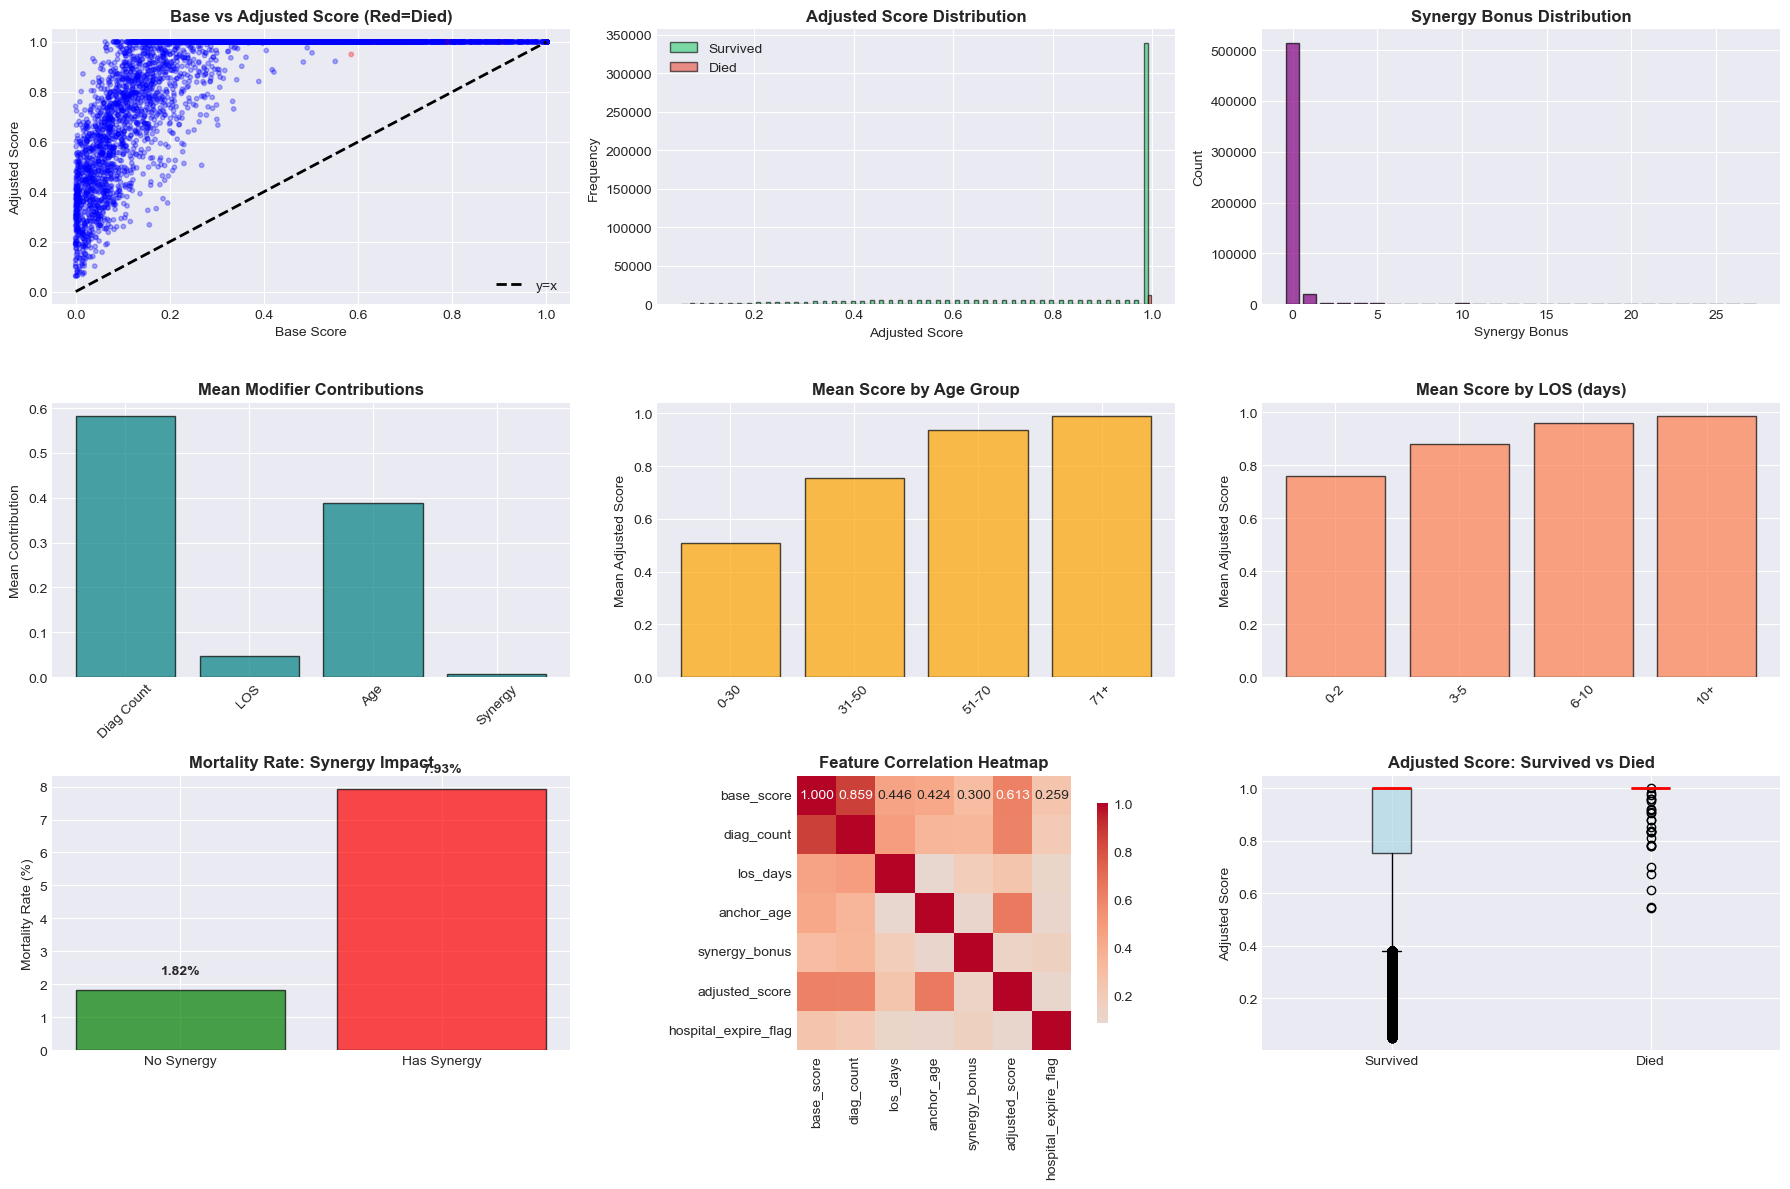


EVALUATING ADJUSTED SCORE PERFORMANCE

Base Score AUROC: 0.9307
Adjusted Score AUROC: 0.6852
Improvement: -26.37%

✓ ROC curve saved as '03_roc_comparison.png'


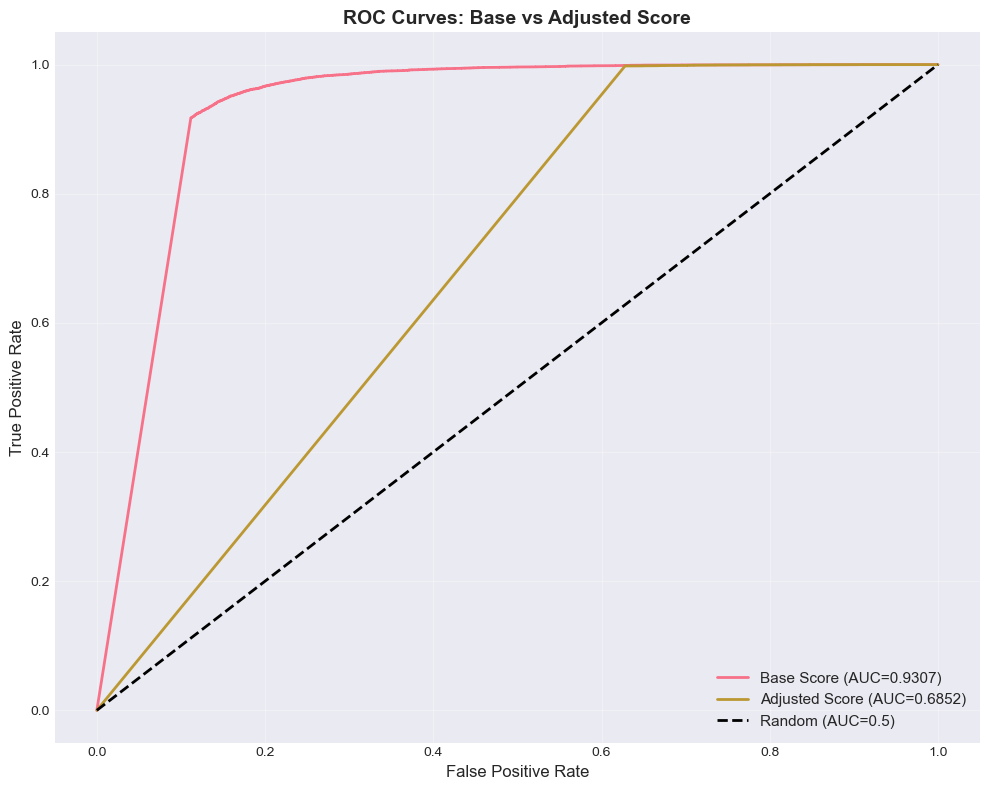


SUMMARY REPORT

FEATURE ENGINEERING SUMMARY

Final Feature Set:
  - Total hospitalizations: 545,497
  - Features per record: 21

Modifiers Added:
  1. Diagnosis Count:
     - Mean: 11.67
     - Contribution: 0.5834

  2. Length of Stay:
     - Mean: 4.76 days
     - Contribution: 0.0476

  3. Age:
     - Mean: 56.9 years
     - Contribution: 0.3890

  4. Synergies:
     - Cases with synergies: 30,438 (5.58%)
     - Mean contribution: 0.0081

Synergy Prevalence:
  - Heart Failure + Pneumonia: 4,289
  - Sepsis + Kidney Disease: 3,846
  - Diabetes + Kidney Disease: 23,156
  - COPD + Pneumonia: 2,626
  - Liver Disease + Sepsis: 2,078

Score Performance:
  - Base Score AUROC: 0.9307
  - Adjusted Score AUROC: 0.6852
  - Improvement: -26.37%

Adjusted Score Statistics:
  - Mean (All): 0.8579
  - Mean (Died): 0.9996
  - Mean (Survived): 0.8548

Next Steps:
  - Train machine learning models
  - Optimize hyperparameters
  - Compare model performance
  - Proceed to Notebook 04


✓ Summary saved 

In [10]:
# Notebook 03: Feature Engineering & Modifiers
# Trifusion: In-Hospital Mortality Risk Prediction
# ================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 60)
print("NOTEBOOK 03: FEATURE ENGINEERING & MODIFIERS")
print("=" * 60)
print("\nLibraries loaded successfully!")

# ================================================
# PART 1: LOAD DATA
# ================================================
print("\n" + "=" * 60)
print("LOADING DATA")
print("=" * 60)

admissions = pd.read_csv('merged_admissions_patients.csv')
diagnoses = pd.read_csv('diagnoses_cleaned.csv')
base_scores = pd.read_csv('base_scores.csv')
diag_risks = pd.read_csv('diagnosis_risks.csv')

print(f"✓ Admissions: {admissions.shape}")
print(f"✓ Diagnoses: {diagnoses.shape}")
print(f"✓ Base scores: {base_scores.shape}")

# ================================================
# PART 2: ADD BASIC MODIFIERS
# ================================================
print("\n" + "=" * 60)
print("ADDING BASIC MODIFIERS")
print("=" * 60)

# Convert dates
admissions['admittime'] = pd.to_datetime(admissions['admittime'])
admissions['dischtime'] = pd.to_datetime(admissions['dischtime'])

# 1. Diagnosis count per hospitalization
print("\n1. Computing diagnosis count...")
diag_count = diagnoses.groupby('hadm_id').size().reset_index(name='diag_count')
print(f"   ✓ Mean: {diag_count['diag_count'].mean():.2f}")
print(f"   ✓ Median: {diag_count['diag_count'].median():.0f}")

# 2. Merge with base scores
print("\n2. Merging modifiers with base scores...")
features = base_scores.merge(diag_count, on='hadm_id', how='left')
features['diag_count'] = features['diag_count'].fillna(0)

# 3. Add admission data (age, LOS)
print("\n3. Adding age and LOS...")
features = features.merge(
    admissions[['hadm_id', 'anchor_age', 'gender', 'los_days']],
    on='hadm_id',
    how='left'
)

print(f"\n✓ Combined features shape: {features.shape}")
print(f"  Missing values:")
missing = features.isnull().sum()
print(missing[missing > 0])

# Fill any missing values
features['los_days'] = features['los_days'].fillna(features['los_days'].median())
features['anchor_age'] = features['anchor_age'].fillna(features['anchor_age'].median())
features['diag_count'] = features['diag_count'].fillna(0)

print("\n✓ Missing values handled")

# ================================================
# PART 3: SYNERGY DETECTION
# ================================================
print("\n" + "=" * 60)
print("DETECTING SYNERGISTIC PATHOLOGIES")
print("=" * 60)

# Define ICD code prefixes for common synergies
synergy_groups = {
    'heart_failure': ['I50', 'I11.0', 'I13.0', 'I13.2'],  # Heart failure codes
    'pneumonia': ['J18', 'J15', 'J16', 'J17'],  # Pneumonia
    'sepsis': ['A41', 'A40'],  # Sepsis
    'kidney_disease': ['N18', 'N19'],  # Chronic kidney disease
    'diabetes': ['E11', 'E10'],  # Diabetes
    'copd': ['J44'],  # COPD
    'liver_disease': ['K70', 'K71', 'K72', 'K73', 'K74'],  # Liver disease
    'stroke': ['I63', 'I64'],  # Stroke
}

def has_code_prefix(icd_list, prefixes):
    """Check if any ICD code starts with given prefixes"""
    return any(any(str(icd).startswith(prefix) for prefix in prefixes) for icd in icd_list)

# Get ICD codes per hospitalization
print("\n1. Building ICD code lists per hadm_id...")
hadm_icd_lists = diagnoses.groupby('hadm_id')['icd_code'].apply(list).to_dict()

# Detect synergies for each hospitalization
print("\n2. Detecting synergies...")
synergy_scores = []

for hadm_id in features['hadm_id']:
    icd_list = hadm_icd_lists.get(hadm_id, [])
    
    # Check for various synergies
    synergies = {
        'hf_pneumonia': (has_code_prefix(icd_list, synergy_groups['heart_failure']) and 
                        has_code_prefix(icd_list, synergy_groups['pneumonia'])),
        'sepsis_kidney': (has_code_prefix(icd_list, synergy_groups['sepsis']) and 
                         has_code_prefix(icd_list, synergy_groups['kidney_disease'])),
        'diabetes_kidney': (has_code_prefix(icd_list, synergy_groups['diabetes']) and 
                           has_code_prefix(icd_list, synergy_groups['kidney_disease'])),
        'copd_pneumonia': (has_code_prefix(icd_list, synergy_groups['copd']) and 
                          has_code_prefix(icd_list, synergy_groups['pneumonia'])),
        'liver_sepsis': (has_code_prefix(icd_list, synergy_groups['liver_disease']) and 
                        has_code_prefix(icd_list, synergy_groups['sepsis'])),
    }
    
    # Calculate bonus (can tune these weights)
    bonus = 0
    if synergies['hf_pneumonia']: bonus += 0.15
    if synergies['sepsis_kidney']: bonus += 0.20
    if synergies['diabetes_kidney']: bonus += 0.10
    if synergies['copd_pneumonia']: bonus += 0.12
    if synergies['liver_sepsis']: bonus += 0.18
    
    synergy_scores.append({
        'hadm_id': hadm_id,
        'synergy_bonus': bonus,
        **synergies
    })

synergy_df = pd.DataFrame(synergy_scores)

print(f"\n✓ Synergies detected for {len(synergy_df):,} hospitalizations")
print(f"\nSynergy prevalence:")
for col in ['hf_pneumonia', 'sepsis_kidney', 'diabetes_kidney', 'copd_pneumonia', 'liver_sepsis']:
    count = synergy_df[col].sum()
    pct = count / len(synergy_df) * 100
    print(f"  {col}: {count:,} ({pct:.2f}%)")

# Merge synergies with features
features = features.merge(synergy_df, on='hadm_id', how='left')
features['synergy_bonus'] = features['synergy_bonus'].fillna(0)

print(f"\n✓ Mean synergy bonus: {features['synergy_bonus'].mean():.4f}")
print(f"  Hospitalizations with synergies: {(features['synergy_bonus'] > 0).sum():,}")

# ================================================
# PART 4: CALCULATE ADJUSTED SCORE
# ================================================
print("\n" + "=" * 60)
print("CALCULATING ADJUSTED SCORES")
print("=" * 60)

# Calculate modifiers
print("\n1. Computing individual modifiers...")

# Diagnosis count modifier
features['diag_count_modifier'] = features['diag_count'] * 0.05

# LOS modifier
features['los_modifier'] = features['los_days'] * 0.01

# Age modifier (per decade over 18)
features['age_modifier'] = ((features['anchor_age'] - 18) / 10 * 0.1).clip(lower=0)

print(f"  Mean diag_count_modifier: {features['diag_count_modifier'].mean():.4f}")
print(f"  Mean los_modifier: {features['los_modifier'].mean():.4f}")
print(f"  Mean age_modifier: {features['age_modifier'].mean():.4f}")
print(f"  Mean synergy_bonus: {features['synergy_bonus'].mean():.4f}")

# Calculate adjusted score
print("\n2. Computing adjusted score...")
features['adjusted_score'] = (
    features['base_score'] + 
    features['diag_count_modifier'] + 
    features['los_modifier'] + 
    features['age_modifier'] + 
    features['synergy_bonus']
).clip(0, 1)

print(f"\n✓ Adjusted scores computed")
print(f"  Mean adjusted score: {features['adjusted_score'].mean():.4f}")
print(f"  Median adjusted score: {features['adjusted_score'].median():.4f}")

# Compare by outcome
died = features[features['hospital_expire_flag']==1]
survived = features[features['hospital_expire_flag']==0]

print(f"\nScore comparison:")
print(f"  Died - Mean: {died['adjusted_score'].mean():.4f}, Median: {died['adjusted_score'].median():.4f}")
print(f"  Survived - Mean: {survived['adjusted_score'].mean():.4f}, Median: {survived['adjusted_score'].median():.4f}")

# ================================================
# PART 5: FEATURE CORRELATION ANALYSIS
# ================================================
print("\n" + "=" * 60)
print("FEATURE CORRELATION ANALYSIS")
print("=" * 60)

# Select numeric features for correlation
correlation_features = [
    'base_score', 'sum_diag_risk', 'Z', 'diag_count',
    'los_days', 'anchor_age', 'synergy_bonus',
    'adjusted_score', 'hospital_expire_flag'
]

corr_matrix = features[correlation_features].corr()

print("\nCorrelation with hospital_expire_flag:")
target_corr = corr_matrix['hospital_expire_flag'].sort_values(ascending=False)
print(target_corr.to_string())

# ================================================
# PART 6: SAVE FINAL FEATURES
# ================================================
print("\n" + "=" * 60)
print("SAVING FINAL FEATURE SET")
print("=" * 60)

# Save complete feature set
features.to_csv('final_features.csv', index=False)
print(f"✓ Saved {len(features):,} records to 'final_features.csv'")

# Save synergy details separately
synergy_summary = synergy_df[synergy_df['synergy_bonus'] > 0]
synergy_summary.to_csv('synergy_pairs_detected.csv', index=False)
print(f"✓ Saved {len(synergy_summary):,} synergy cases to 'synergy_pairs_detected.csv'")

# ================================================
# PART 7: VISUALIZATIONS
# ================================================
print("\n" + "=" * 60)
print("CREATING VISUALIZATIONS")
print("=" * 60)

fig = plt.figure(figsize=(18, 12))

# 1. Base score vs Adjusted score
ax1 = plt.subplot(3, 3, 1)
sample = features.sample(min(5000, len(features)))
colors = ['red' if x==1 else 'blue' for x in sample['hospital_expire_flag']]
ax1.scatter(sample['base_score'], sample['adjusted_score'],
            c=colors, alpha=0.3, s=10)
ax1.plot([0, 1], [0, 1], 'k--', linewidth=2, label='y=x')
ax1.set_xlabel('Base Score')
ax1.set_ylabel('Adjusted Score')
ax1.set_title('Base vs Adjusted Score (Red=Died)', fontweight='bold')
ax1.legend()

# 2. Distribution of adjusted scores by outcome
ax2 = plt.subplot(3, 3, 2)
ax2.hist([survived['adjusted_score'], died['adjusted_score']],
         bins=50, label=['Survived', 'Died'],
         color=['#2ecc71', '#e74c3c'], alpha=0.6, edgecolor='black')
ax2.set_xlabel('Adjusted Score')
ax2.set_ylabel('Frequency')
ax2.set_title('Adjusted Score Distribution', fontweight='bold')
ax2.legend()

# 3. Synergy bonus distribution
ax3 = plt.subplot(3, 3, 3)
synergy_counts = features['synergy_bonus'].value_counts().sort_index()
ax3.bar(range(len(synergy_counts)), synergy_counts.values,
        color='purple', alpha=0.7, edgecolor='black')
ax3.set_xlabel('Synergy Bonus')
ax3.set_ylabel('Count')
ax3.set_title('Synergy Bonus Distribution', fontweight='bold')

# 4. Modifier contributions
ax4 = plt.subplot(3, 3, 4)
modifiers = ['diag_count_modifier', 'los_modifier', 'age_modifier', 'synergy_bonus']
means = [features[m].mean() for m in modifiers]
ax4.bar(range(len(modifiers)), means, color='teal', alpha=0.7, edgecolor='black')
ax4.set_xticks(range(len(modifiers)))
ax4.set_xticklabels(['Diag Count', 'LOS', 'Age', 'Synergy'], rotation=45)
ax4.set_ylabel('Mean Contribution')
ax4.set_title('Mean Modifier Contributions', fontweight='bold')

# 5. Age vs adjusted score
ax5 = plt.subplot(3, 3, 5)
age_bins = pd.cut(features['anchor_age'], bins=[0, 30, 50, 70, 100])
age_score = features.groupby(age_bins)['adjusted_score'].mean()
ax5.bar(range(len(age_score)), age_score.values, color='orange', alpha=0.7, edgecolor='black')
ax5.set_xticks(range(len(age_score)))
ax5.set_xticklabels(['0-30', '31-50', '51-70', '71+'], rotation=45)
ax5.set_ylabel('Mean Adjusted Score')
ax5.set_title('Mean Score by Age Group', fontweight='bold')

# 6. LOS vs adjusted score
ax6 = plt.subplot(3, 3, 6)
los_bins = pd.cut(features['los_days'], bins=[0, 2, 5, 10, 100])
los_score = features.groupby(los_bins)['adjusted_score'].mean()
ax6.bar(range(len(los_score)), los_score.values, color='coral', alpha=0.7, edgecolor='black')
ax6.set_xticks(range(len(los_score)))
ax6.set_xticklabels(['0-2', '3-5', '6-10', '10+'], rotation=45)
ax6.set_ylabel('Mean Adjusted Score')
ax6.set_title('Mean Score by LOS (days)', fontweight='bold')

# 7. Synergy impact on mortality
ax7 = plt.subplot(3, 3, 7)
synergy_mortality = features.groupby(features['synergy_bonus'] > 0)['hospital_expire_flag'].mean() * 100
ax7.bar(['No Synergy', 'Has Synergy'], synergy_mortality.values,
        color=['green', 'red'], alpha=0.7, edgecolor='black')
ax7.set_ylabel('Mortality Rate (%)')
ax7.set_title('Mortality Rate: Synergy Impact', fontweight='bold')
for i, v in enumerate(synergy_mortality.values):
    ax7.text(i, v+0.5, f'{v:.2f}%', ha='center', fontweight='bold')

# 8. Correlation heatmap
ax8 = plt.subplot(3, 3, 8)
plot_features = ['base_score', 'diag_count', 'los_days', 'anchor_age',
                 'synergy_bonus', 'adjusted_score', 'hospital_expire_flag']
corr_subset = features[plot_features].corr()
sns.heatmap(corr_subset, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, ax=ax8, square=True, cbar_kws={'shrink': 0.8})
ax8.set_title('Feature Correlation Heatmap', fontweight='bold')

# 9. Boxplot of adjusted scores
ax9 = plt.subplot(3, 3, 9)
ax9.boxplot([survived['adjusted_score'], died['adjusted_score']],
            labels=['Survived', 'Died'], patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7),
            medianprops=dict(color='red', linewidth=2))
ax9.set_ylabel('Adjusted Score')
ax9.set_title('Adjusted Score: Survived vs Died', fontweight='bold')

plt.tight_layout()
plt.savefig('03_feature_engineering.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualization saved as '03_feature_engineering.png'")
plt.show()

# ================================================
# PART 8: PERFORMANCE CHECK
# ================================================
print("\n" + "=" * 60)
print("EVALUATING ADJUSTED SCORE PERFORMANCE")
print("=" * 60)

from sklearn.metrics import roc_auc_score, roc_curve

# Calculate AUROC for base score
base_auc = roc_auc_score(features['hospital_expire_flag'], features['base_score'])
print(f"\nBase Score AUROC: {base_auc:.4f}")

# Calculate AUROC for adjusted score
adjusted_auc = roc_auc_score(features['hospital_expire_flag'], features['adjusted_score'])
print(f"Adjusted Score AUROC: {adjusted_auc:.4f}")

improvement = ((adjusted_auc - base_auc) / base_auc) * 100
print(f"Improvement: {improvement:.2f}%")

# Plot ROC curves
fig, ax = plt.subplots(figsize=(10, 8))

fpr_base, tpr_base, _ = roc_curve(features['hospital_expire_flag'], features['base_score'])
fpr_adj, tpr_adj, _ = roc_curve(features['hospital_expire_flag'], features['adjusted_score'])

ax.plot(fpr_base, tpr_base, linewidth=2, label=f'Base Score (AUC={base_auc:.4f})')
ax.plot(fpr_adj, tpr_adj, linewidth=2, label=f'Adjusted Score (AUC={adjusted_auc:.4f})')
ax.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random (AUC=0.5)')

ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_title('ROC Curves: Base vs Adjusted Score', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('03_roc_comparison.png', dpi=300, bbox_inches='tight')
print("\n✓ ROC curve saved as '03_roc_comparison.png'")
plt.show()

# ================================================
# PART 9: SUMMARY REPORT
# ================================================
print("\n" + "=" * 60)
print("SUMMARY REPORT")
print("=" * 60)

summary = f"""
FEATURE ENGINEERING SUMMARY
============================

Final Feature Set:
  - Total hospitalizations: {len(features):,}
  - Features per record: {features.shape[1]}

Modifiers Added:
  1. Diagnosis Count:
     - Mean: {features['diag_count'].mean():.2f}
     - Contribution: {features['diag_count_modifier'].mean():.4f}

  2. Length of Stay:
     - Mean: {features['los_days'].mean():.2f} days
     - Contribution: {features['los_modifier'].mean():.4f}

  3. Age:
     - Mean: {features['anchor_age'].mean():.1f} years
     - Contribution: {features['age_modifier'].mean():.4f}

  4. Synergies:
     - Cases with synergies: {(features['synergy_bonus'] > 0).sum():,} ({(features['synergy_bonus'] > 0).sum()/len(features)*100:.2f}%)
     - Mean contribution: {features['synergy_bonus'].mean():.4f}

Synergy Prevalence:
  - Heart Failure + Pneumonia: {synergy_df['hf_pneumonia'].sum():,}
  - Sepsis + Kidney Disease: {synergy_df['sepsis_kidney'].sum():,}
  - Diabetes + Kidney Disease: {synergy_df['diabetes_kidney'].sum():,}
  - COPD + Pneumonia: {synergy_df['copd_pneumonia'].sum():,}
  - Liver Disease + Sepsis: {synergy_df['liver_sepsis'].sum():,}

Score Performance:
  - Base Score AUROC: {base_auc:.4f}
  - Adjusted Score AUROC: {adjusted_auc:.4f}
  - Improvement: {improvement:.2f}%

Adjusted Score Statistics:
  - Mean (All): {features['adjusted_score'].mean():.4f}
  - Mean (Died): {died['adjusted_score'].mean():.4f}
  - Mean (Survived): {survived['adjusted_score'].mean():.4f}

Next Steps:
  - Train machine learning models
  - Optimize hyperparameters
  - Compare model performance
  - Proceed to Notebook 04
"""

print(summary)

# Save with UTF-8 encoding to handle special characters
with open('03_summary_report.txt', 'w', encoding='utf-8') as f:
    f.write(summary)

print("\n✓ Summary saved as '03_summary_report.txt'")

print("\n" + "=" * 60)
print("NOTEBOOK 03 COMPLETE!")
print("=" * 60)
print("\nNext: Run Notebook 04 - Machine Learning Model Training")
print("=" * 60)

NOTEBOOK 04: MACHINE LEARNING MODEL TRAINING

Libraries loaded successfully!

LOADING DATA
✓ Loaded 545,497 records with 21 features

✓ Feature matrix: (545497, 8)
✓ Target variable: (545497,)
  Positive class (deaths): 11,792 (2.16%)
  Negative class (survivals): 533,705 (97.84%)

⚠ Missing values detected:
drg_severity    178566
dtype: int64
✓ Filled with median values

SPLITTING DATA

✓ Training set: 436,397 (80.0%)
  Deaths: 9,434 (2.16%)

✓ Test set: 109,100 (20.0%)
  Deaths: 2,358 (2.16%)

TRAINING MODEL 1: LOGISTIC REGRESSION

1. Training with default parameters...

✓ Logistic Regression Results:
  Training AUROC: 0.9786
  Test AUROC: 0.9802
  Overfitting check: -0.0016

  Feature importance (coefficients):
      feature  coefficient
   base_score     5.563724
sum_diag_risk     3.083215
            Z     0.955051
   anchor_age     0.027790
     los_days    -0.049221
 drg_severity    -0.060871
   diag_count    -0.211943
synergy_bonus    -0.956049

✓ Model saved as 'model_logistic

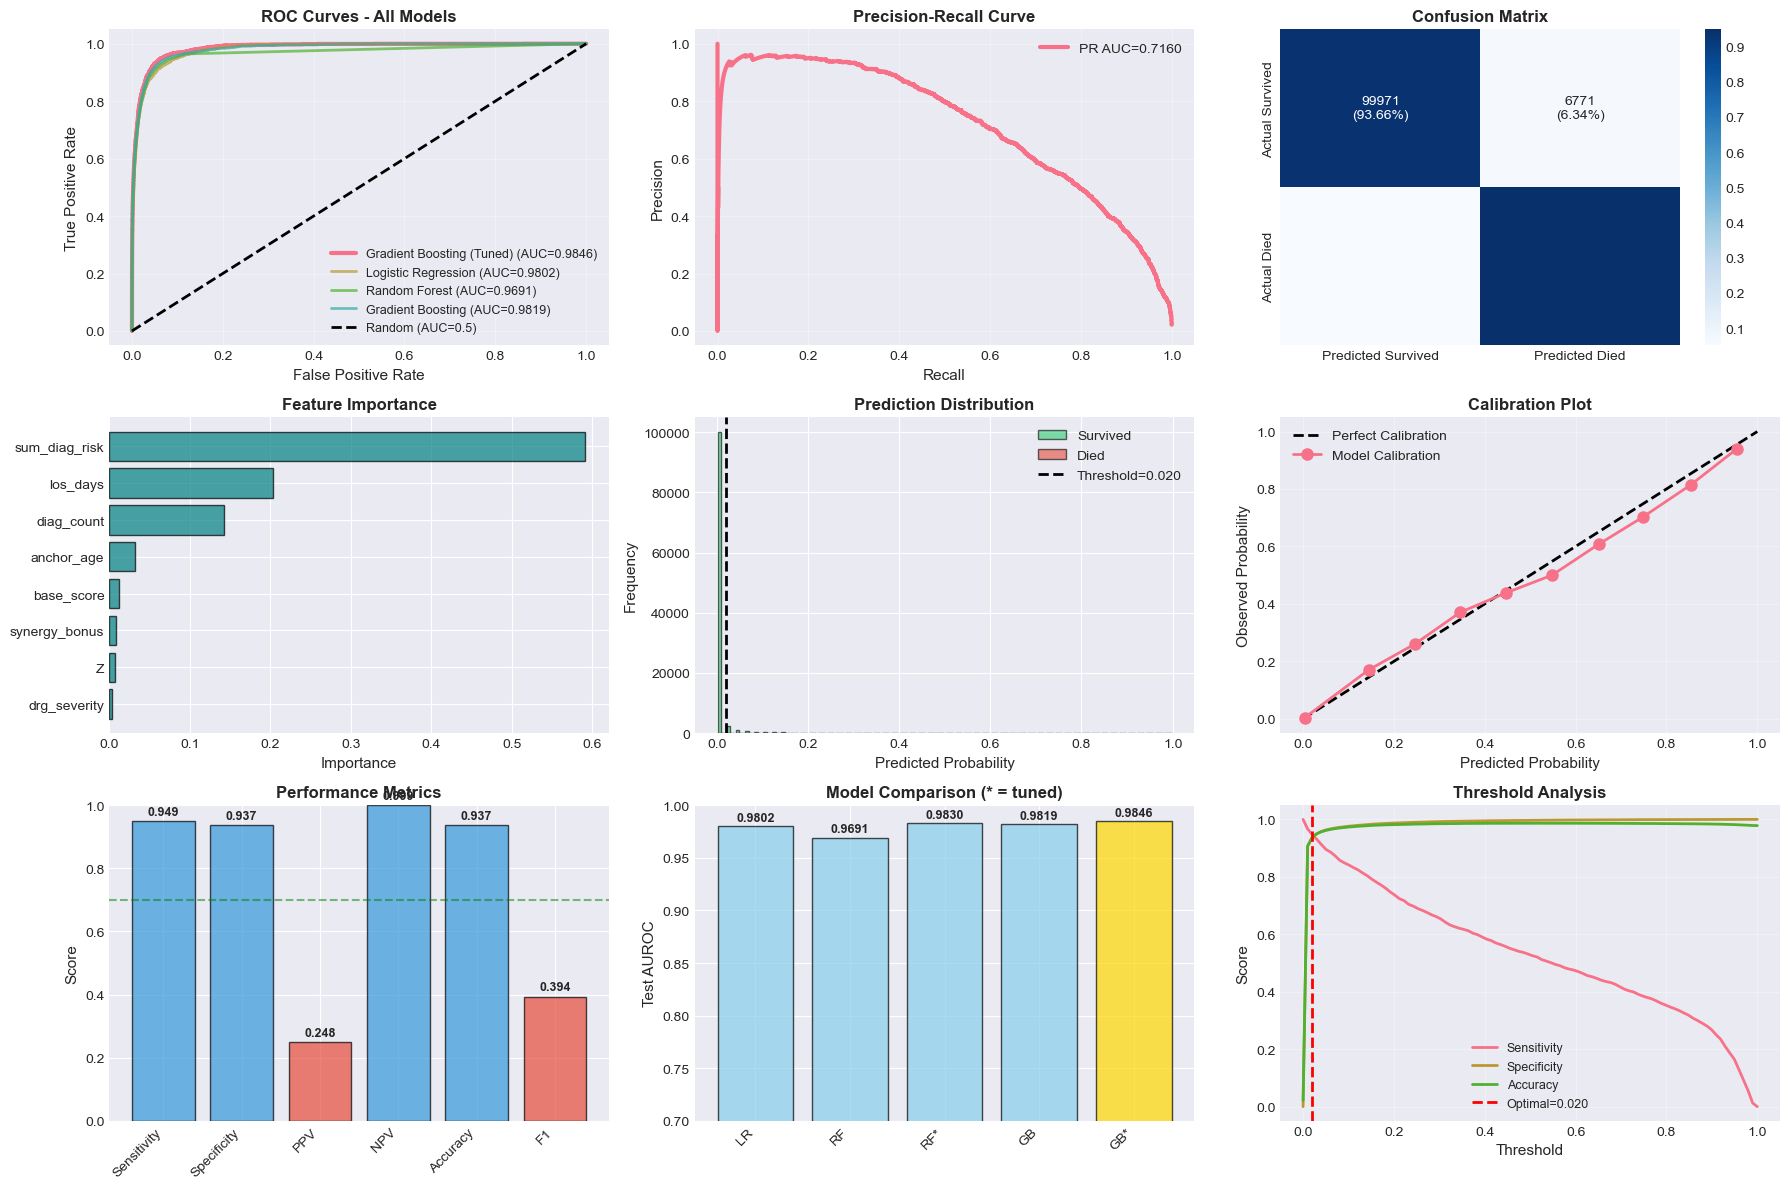


FINAL SUMMARY REPORT

MACHINE LEARNING MODEL TRAINING SUMMARY

Dataset:
  - Total samples: 545,497
  - Training set: 436,397 (80.0%)
  - Test set: 109,100 (20.0%)
  - Positive class (deaths): 11,792 (2.16%)

Models Trained:
  1. Logistic Regression: AUROC = 0.9802
  2. Random Forest: AUROC = 0.9691
  3. Random Forest (Tuned): AUROC = 0.9830
  4. Gradient Boosting: AUROC = 0.9819
  5. Gradient Boosting (Tuned): AUROC = 0.9846

BEST MODEL: Gradient Boosting (Tuned)
  Test AUROC: 0.9846
  Optimal Threshold: 0.0197

Performance Metrics:
  - Sensitivity (Recall): 0.9491
  - Specificity: 0.9366
  - Positive Predictive Value (Precision): 0.2484
  - Negative Predictive Value: 0.9988
  - Accuracy: 0.9368
  - F1 Score: 0.3938

Confusion Matrix:
  - True Negatives: 99,971
  - False Positives: 6,771
  - False Negatives: 120
  - True Positives: 2,238

Interpretation:
  - The model correctly identifies 94.9% of patients who will die
  - The model correctly identifies 93.7% of patients who will surv

In [11]:
# Notebook 04: Machine Learning Model Training & Evaluation
# Trifusion: In-Hospital Mortality Risk Prediction
# ==================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (roc_auc_score, roc_curve, confusion_matrix,
                            classification_report, precision_recall_curve, auc)
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 60)
print("NOTEBOOK 04: MACHINE LEARNING MODEL TRAINING")
print("=" * 60)
print("\nLibraries loaded successfully!")

# ================================================
# PART 1: LOAD DATA & PREPARE FEATURES
# ================================================
print("\n" + "=" * 60)
print("LOADING DATA")
print("=" * 60)

features = pd.read_csv('final_features.csv')
print(f"✓ Loaded {len(features):,} records with {features.shape[1]} features")

# Select features for ML
feature_cols = [
    'base_score',
    'sum_diag_risk',
    'Z',
    'diag_count',
    'los_days',
    'anchor_age',
    'synergy_bonus',
    'drg_severity'
]

# Prepare X and y
X = features[feature_cols].copy()
y = features['hospital_expire_flag'].copy()

print(f"\n✓ Feature matrix: {X.shape}")
print(f"✓ Target variable: {y.shape}")
print(f"  Positive class (deaths): {y.sum():,} ({y.mean()*100:.2f}%)")
print(f"  Negative class (survivals): {(~y.astype(bool)).sum():,} ({(1-y.mean())*100:.2f}%)")

# Check for missing values
missing = X.isnull().sum()
if missing.sum() > 0:
    print(f"\n⚠ Missing values detected:")
    print(missing[missing > 0])
    # Fill with median
    X = X.fillna(X.median())
    print("✓ Filled with median values")

# ================================================
# PART 2: TRAIN-TEST SPLIT
# ================================================
print("\n" + "=" * 60)
print("SPLITTING DATA")
print("=" * 60)

# Stratified split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\n✓ Training set: {len(X_train):,} ({len(X_train)/len(X)*100:.1f}%)")
print(f"  Deaths: {y_train.sum():,} ({y_train.mean()*100:.2f}%)")

print(f"\n✓ Test set: {len(X_test):,} ({len(X_test)/len(X)*100:.1f}%)")
print(f"  Deaths: {y_test.sum():,} ({y_test.mean()*100:.2f}%)")

# ================================================
# PART 3: BASELINE MODEL - LOGISTIC REGRESSION
# ================================================
print("\n" + "=" * 60)
print("TRAINING MODEL 1: LOGISTIC REGRESSION")
print("=" * 60)

print("\n1. Training with default parameters...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predictions
lr_train_pred_proba = lr_model.predict_proba(X_train)[:, 1]
lr_test_pred_proba = lr_model.predict_proba(X_test)[:, 1]

# Evaluate
lr_train_auc = roc_auc_score(y_train, lr_train_pred_proba)
lr_test_auc = roc_auc_score(y_test, lr_test_pred_proba)

print(f"\n✓ Logistic Regression Results:")
print(f"  Training AUROC: {lr_train_auc:.4f}")
print(f"  Test AUROC: {lr_test_auc:.4f}")
print(f"  Overfitting check: {lr_train_auc - lr_test_auc:.4f}")

# Feature importance (coefficients)
lr_coef = pd.DataFrame({
    'feature': feature_cols,
    'coefficient': lr_model.coef_[0]
}).sort_values('coefficient', ascending=False)

print(f"\n  Feature importance (coefficients):")
print(lr_coef.to_string(index=False))

# Save model
with open('model_logistic_regression.pkl', 'wb') as f:
    pickle.dump(lr_model, f)
print("\n✓ Model saved as 'model_logistic_regression.pkl'")

# ================================================
# PART 4: RANDOM FOREST
# ================================================
print("\n" + "=" * 60)
print("TRAINING MODEL 2: RANDOM FOREST")
print("=" * 60)

print("\n1. Training with default parameters...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predictions
rf_train_pred_proba = rf_model.predict_proba(X_train)[:, 1]
rf_test_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate
rf_train_auc = roc_auc_score(y_train, rf_train_pred_proba)
rf_test_auc = roc_auc_score(y_test, rf_test_pred_proba)

print(f"\n✓ Random Forest Results:")
print(f"  Training AUROC: {rf_train_auc:.4f}")
print(f"  Test AUROC: {rf_test_auc:.4f}")
print(f"  Overfitting check: {rf_train_auc - rf_test_auc:.4f}")

# Feature importance
rf_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n  Feature importance:")
print(rf_importance.to_string(index=False))

# Hyperparameter tuning
print("\n2. Hyperparameter tuning (this may take a few minutes)...")
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\n✓ Best parameters: {grid_search.best_params_}")
print(f"  Best CV score: {grid_search.best_score_:.4f}")

# Use best model
rf_best_model = grid_search.best_estimator_
rf_best_test_pred_proba = rf_best_model.predict_proba(X_test)[:, 1]
rf_best_test_auc = roc_auc_score(y_test, rf_best_test_pred_proba)

print(f"  Test AUROC (best model): {rf_best_test_auc:.4f}")

# Save best model
with open('model_random_forest_best.pkl', 'wb') as f:
    pickle.dump(rf_best_model, f)
print("\n✓ Best model saved as 'model_random_forest_best.pkl'")

# ================================================
# PART 5: GRADIENT BOOSTING
# ================================================
print("\n" + "=" * 60)
print("TRAINING MODEL 3: GRADIENT BOOSTING")
print("=" * 60)

print("\n1. Training with default parameters...")
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
gb_train_pred_proba = gb_model.predict_proba(X_train)[:, 1]
gb_test_pred_proba = gb_model.predict_proba(X_test)[:, 1]

# Evaluate
gb_train_auc = roc_auc_score(y_train, gb_train_pred_proba)
gb_test_auc = roc_auc_score(y_test, gb_test_pred_proba)

print(f"\n✓ Gradient Boosting Results:")
print(f"  Training AUROC: {gb_train_auc:.4f}")
print(f"  Test AUROC: {gb_test_auc:.4f}")
print(f"  Overfitting check: {gb_train_auc - gb_test_auc:.4f}")

# Feature importance
gb_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': gb_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n  Feature importance:")
print(gb_importance.to_string(index=False))

# Hyperparameter tuning
print("\n2. Hyperparameter tuning (this may take a few minutes)...")
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\n✓ Best parameters: {grid_search.best_params_}")
print(f"  Best CV score: {grid_search.best_score_:.4f}")

# Use best model
gb_best_model = grid_search.best_estimator_
gb_best_test_pred_proba = gb_best_model.predict_proba(X_test)[:, 1]
gb_best_test_auc = roc_auc_score(y_test, gb_best_test_pred_proba)

print(f"  Test AUROC (best model): {gb_best_test_auc:.4f}")

# Save best model
with open('model_gradient_boosting_best.pkl', 'wb') as f:
    pickle.dump(gb_best_model, f)
print("\n✓ Best model saved as 'model_gradient_boosting_best.pkl'")

# ================================================
# PART 6: MODEL COMPARISON
# ================================================
print("\n" + "=" * 60)
print("MODEL PERFORMANCE COMPARISON")
print("=" * 60)

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Random Forest (Tuned)',
              'Gradient Boosting', 'Gradient Boosting (Tuned)'],
    'Train_AUROC': [lr_train_auc, rf_train_auc, np.nan, gb_train_auc, np.nan],
    'Test_AUROC': [lr_test_auc, rf_test_auc, rf_best_test_auc, gb_test_auc, gb_best_test_auc]
})

print("\n" + results.to_string(index=False))

# Select best model
best_idx = results['Test_AUROC'].idxmax()
best_model_name = results.loc[best_idx, 'Model']
best_test_auc = results.loc[best_idx, 'Test_AUROC']

print(f"\n✓ BEST MODEL: {best_model_name}")
print(f"  Test AUROC: {best_test_auc:.4f}")

# Save comparison
results.to_csv('model_comparison.csv', index=False)
print("\n✓ Comparison saved as 'model_comparison.csv'")

# Select best model for further analysis
if 'Gradient Boosting (Tuned)' in best_model_name:
    best_model = gb_best_model
    best_pred_proba = gb_best_test_pred_proba
elif 'Random Forest (Tuned)' in best_model_name:
    best_model = rf_best_model
    best_pred_proba = rf_best_test_pred_proba
elif 'Gradient Boosting' in best_model_name:
    best_model = gb_model
    best_pred_proba = gb_test_pred_proba
elif 'Random Forest' in best_model_name:
    best_model = rf_model
    best_pred_proba = rf_test_pred_proba
else:
    best_model = lr_model
    best_pred_proba = lr_test_pred_proba

# ================================================
# PART 7: DETAILED EVALUATION OF BEST MODEL
# ================================================
print("\n" + "=" * 60)
print(f"DETAILED EVALUATION: {best_model_name}")
print("=" * 60)

# Find optimal threshold using Youden's J statistic
fpr, tpr, thresholds = roc_curve(y_test, best_pred_proba)
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]

print(f"\n✓ Optimal threshold: {optimal_threshold:.4f}")
print(f"  Sensitivity (TPR): {tpr[optimal_idx]:.4f}")
print(f"  Specificity (1-FPR): {1-fpr[optimal_idx]:.4f}")

# Predictions at optimal threshold
best_pred_binary = (best_pred_proba >= optimal_threshold).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, best_pred_binary)
tn, fp, fn, tp = cm.ravel()

print(f"\nConfusion Matrix:")
print(f"  True Negatives: {tn:,}")
print(f"  False Positives: {fp:,}")
print(f"  False Negatives: {fn:,}")
print(f"  True Positives: {tp:,}")

# Metrics
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
npv = tn / (tn + fn) if (tn + fn) > 0 else 0
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity) if (ppv + sensitivity) > 0 else 0

print(f"\nPerformance Metrics (at threshold={optimal_threshold:.4f}):")
print(f"  Sensitivity (Recall): {sensitivity:.4f}")
print(f"  Specificity: {specificity:.4f}")
print(f"  PPV (Precision): {ppv:.4f}")
print(f"  NPV: {npv:.4f}")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  F1 Score: {f1:.4f}")

# Classification report
print(f"\nClassification Report:")
print(classification_report(y_test, best_pred_binary,
                          target_names=['Survived', 'Died']))

# ================================================
# PART 8: SAVE RESULTS
# ================================================
print("\n" + "=" * 60)
print("SAVING RESULTS")
print("=" * 60)

# Save predictions
test_results = pd.DataFrame({
    'hadm_id': features.loc[X_test.index, 'hadm_id'],
    'actual': y_test,
    'predicted_proba': best_pred_proba,
    'predicted_binary': best_pred_binary
})
test_results.to_csv('test_predictions.csv', index=False)
print("✓ Test predictions saved as 'test_predictions.csv'")

# Save performance metrics
metrics_df = pd.DataFrame({
    'Metric': ['AUROC', 'Sensitivity', 'Specificity', 'PPV', 'NPV',
               'Accuracy', 'F1', 'Optimal_Threshold'],
    'Value': [best_test_auc, sensitivity, specificity, ppv, npv,
              accuracy, f1, optimal_threshold]
})
metrics_df.to_csv('performance_metrics.csv', index=False)
print("✓ Performance metrics saved as 'performance_metrics.csv'")

# ================================================
# PART 9: COMPREHENSIVE VISUALIZATIONS
# ================================================
print("\n" + "=" * 60)
print("CREATING VISUALIZATIONS")
print("=" * 60)

fig = plt.figure(figsize=(18, 12))

# 1. ROC Curves - All Models
ax1 = plt.subplot(3, 3, 1)
ax1.plot(fpr, tpr, linewidth=3, label=f'{best_model_name} (AUC={best_test_auc:.4f})')

# Plot other models
for name, pred in [('Logistic Regression', lr_test_pred_proba),
                   ('Random Forest', rf_test_pred_proba),
                   ('Gradient Boosting', gb_test_pred_proba)]:
    if name != best_model_name:
        fpr_temp, tpr_temp, _ = roc_curve(y_test, pred)
        auc_temp = roc_auc_score(y_test, pred)
        ax1.plot(fpr_temp, tpr_temp, linewidth=2, alpha=0.7, label=f'{name} (AUC={auc_temp:.4f})')

ax1.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random (AUC=0.5)')
ax1.set_xlabel('False Positive Rate', fontsize=11)
ax1.set_ylabel('True Positive Rate', fontsize=11)
ax1.set_title('ROC Curves - All Models', fontweight='bold', fontsize=12)
ax1.legend(fontsize=9)
ax1.grid(alpha=0.3)

# 2. Precision-Recall Curve
ax2 = plt.subplot(3, 3, 2)
precision, recall, _ = precision_recall_curve(y_test, best_pred_proba)
pr_auc = auc(recall, precision)
ax2.plot(recall, precision, linewidth=3, label=f'PR AUC={pr_auc:.4f}')
ax2.set_xlabel('Recall', fontsize=11)
ax2.set_ylabel('Precision', fontsize=11)
ax2.set_title('Precision-Recall Curve', fontweight='bold', fontsize=12)
ax2.legend(fontsize=10)
ax2.grid(alpha=0.3)

# 3. Confusion Matrix Heatmap
ax3 = plt.subplot(3, 3, 3)
cm_display = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_display, annot=np.array([[f'{tn}\n({cm_display[0,0]:.2%})', f'{fp}\n({cm_display[0,1]:.2%})'],
                                         [f'{fn}\n({cm_display[1,0]:.2%})', f'{tp}\n({cm_display[1,1]:.2%})']]),
            fmt='', cmap='Blues', ax=ax3, cbar=True,
            xticklabels=['Predicted Survived', 'Predicted Died'],
            yticklabels=['Actual Survived', 'Actual Died'])
ax3.set_title('Confusion Matrix', fontweight='bold', fontsize=12)

# 4. Feature Importance
ax4 = plt.subplot(3, 3, 4)
if hasattr(best_model, 'feature_importances_'):
    importance_df = pd.DataFrame({
        'feature': feature_cols,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=True)
    ax4.barh(range(len(importance_df)), importance_df['importance'],
             color='teal', alpha=0.7, edgecolor='black')
    ax4.set_yticks(range(len(importance_df)))
    ax4.set_yticklabels(importance_df['feature'], fontsize=10)
    ax4.set_xlabel('Importance', fontsize=11)
    ax4.set_title('Feature Importance', fontweight='bold', fontsize=12)
else:
    lr_coef_sorted = lr_coef.sort_values('coefficient')
    ax4.barh(range(len(lr_coef_sorted)), lr_coef_sorted['coefficient'],
             color='teal', alpha=0.7, edgecolor='black')
    ax4.set_yticks(range(len(lr_coef_sorted)))
    ax4.set_yticklabels(lr_coef_sorted['feature'], fontsize=10)
    ax4.set_xlabel('Coefficient', fontsize=11)
    ax4.set_title('Feature Coefficients', fontweight='bold', fontsize=12)

# 5. Prediction distribution
ax5 = plt.subplot(3, 3, 5)
died_pred = best_pred_proba[y_test == 1]
survived_pred = best_pred_proba[y_test == 0]
ax5.hist([survived_pred, died_pred], bins=50,
         label=['Survived', 'Died'],
         color=['#2ecc71', '#e74c3c'],
         alpha=0.6, edgecolor='black')
ax5.axvline(optimal_threshold, color='black', linestyle='--', linewidth=2,
            label=f'Threshold={optimal_threshold:.3f}')
ax5.set_xlabel('Predicted Probability', fontsize=11)
ax5.set_ylabel('Frequency', fontsize=11)
ax5.set_title('Prediction Distribution', fontweight='bold', fontsize=12)
ax5.legend()

# 6. Calibration curve
ax6 = plt.subplot(3, 3, 6)
n_bins = 10
pred_binned = pd.cut(best_pred_proba, bins=n_bins)
calibration_data = pd.DataFrame({
    'pred': best_pred_proba,
    'actual': y_test,
    'bin': pred_binned
})
calibration = calibration_data.groupby('bin').agg({
    'pred': 'mean',
    'actual': 'mean'
}).dropna()
ax6.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Perfect Calibration')
ax6.plot(calibration['pred'], calibration['actual'], 'o-', linewidth=2,
         markersize=8, label='Model Calibration')
ax6.set_xlabel('Predicted Probability', fontsize=11)
ax6.set_ylabel('Observed Probability', fontsize=11)
ax6.set_title('Calibration Plot', fontweight='bold', fontsize=12)
ax6.legend()
ax6.grid(alpha=0.3)

# 7. Performance metrics bar chart
ax7 = plt.subplot(3, 3, 7)
metrics = ['Sensitivity', 'Specificity', 'PPV', 'NPV', 'Accuracy', 'F1']
values = [sensitivity, specificity, ppv, npv, accuracy, f1]
colors_bar = ['#3498db' if v >= 0.7 else '#e74c3c' for v in values]
ax7.bar(range(len(metrics)), values, color=colors_bar, alpha=0.7, edgecolor='black')
ax7.set_xticks(range(len(metrics)))
ax7.set_xticklabels(metrics, rotation=45, ha='right')
ax7.set_ylabel('Score', fontsize=11)
ax7.set_ylim([0, 1])
ax7.set_title('Performance Metrics', fontweight='bold', fontsize=12)
ax7.axhline(0.7, color='green', linestyle='--', alpha=0.5, label='Target (0.7)')
for i, v in enumerate(values):
    ax7.text(i, v+0.02, f'{v:.3f}', ha='center', fontsize=9, fontweight='bold')

# 8. Model comparison bar chart
ax8 = plt.subplot(3, 3, 8)
model_names_short = ['LR', 'RF', 'RF*', 'GB', 'GB*']
model_aucs = results['Test_AUROC'].values
colors_models = ['gold' if name == best_model_name else 'skyblue'
                 for name in results['Model']]
ax8.bar(range(len(model_names_short)), model_aucs,
        color=colors_models, alpha=0.7, edgecolor='black')
ax8.set_xticks(range(len(model_names_short)))
ax8.set_xticklabels(model_names_short, rotation=45, ha='right')
ax8.set_ylabel('Test AUROC', fontsize=11)
ax8.set_ylim([0.7, 1.0])
ax8.set_title('Model Comparison (* = tuned)', fontweight='bold', fontsize=12)
for i, v in enumerate(model_aucs):
    ax8.text(i, v+0.005, f'{v:.4f}', ha='center', fontsize=9, fontweight='bold')

# 9. Threshold analysis
ax9 = plt.subplot(3, 3, 9)
thresholds_test = np.linspace(0, 1, 100)
sens_list, spec_list, acc_list = [], [], []
for t in thresholds_test:
    pred_t = (best_pred_proba >= t).astype(int)
    cm_t = confusion_matrix(y_test, pred_t)
    tn_t, fp_t, fn_t, tp_t = cm_t.ravel()
    sens_list.append(tp_t / (tp_t + fn_t) if (tp_t + fn_t) > 0 else 0)
    spec_list.append(tn_t / (tn_t + fp_t) if (tn_t + fp_t) > 0 else 0)
    acc_list.append((tp_t + tn_t) / (tp_t + tn_t + fp_t + fn_t))

ax9.plot(thresholds_test, sens_list, label='Sensitivity', linewidth=2)
ax9.plot(thresholds_test, spec_list, label='Specificity', linewidth=2)
ax9.plot(thresholds_test, acc_list, label='Accuracy', linewidth=2)
ax9.axvline(optimal_threshold, color='red', linestyle='--', linewidth=2,
            label=f'Optimal={optimal_threshold:.3f}')
ax9.set_xlabel('Threshold', fontsize=11)
ax9.set_ylabel('Score', fontsize=11)
ax9.set_title('Threshold Analysis', fontweight='bold', fontsize=12)
ax9.legend(fontsize=9)
ax9.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('04_model_evaluation.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualization saved as '04_model_evaluation.png'")
plt.show()

# ================================================
# PART 10: SUMMARY REPORT
# ================================================
print("\n" + "=" * 60)
print("FINAL SUMMARY REPORT")
print("=" * 60)

summary = f"""
MACHINE LEARNING MODEL TRAINING SUMMARY
========================================

Dataset:
  - Total samples: {len(X):,}
  - Training set: {len(X_train):,} ({len(X_train)/len(X)*100:.1f}%)
  - Test set: {len(X_test):,} ({len(X_test)/len(X)*100:.1f}%)
  - Positive class (deaths): {y.sum():,} ({y.mean()*100:.2f}%)

Models Trained:
  1. Logistic Regression: AUROC = {lr_test_auc:.4f}
  2. Random Forest: AUROC = {rf_test_auc:.4f}
  3. Random Forest (Tuned): AUROC = {rf_best_test_auc:.4f}
  4. Gradient Boosting: AUROC = {gb_test_auc:.4f}
  5. Gradient Boosting (Tuned): AUROC = {gb_best_test_auc:.4f}

BEST MODEL: {best_model_name}
====================================
  Test AUROC: {best_test_auc:.4f}
  Optimal Threshold: {optimal_threshold:.4f}

Performance Metrics:
  - Sensitivity (Recall): {sensitivity:.4f}
  - Specificity: {specificity:.4f}
  - Positive Predictive Value (Precision): {ppv:.4f}
  - Negative Predictive Value: {npv:.4f}
  - Accuracy: {accuracy:.4f}
  - F1 Score: {f1:.4f}

Confusion Matrix:
  - True Negatives: {tn:,}
  - False Positives: {fp:,}
  - False Negatives: {fn:,}
  - True Positives: {tp:,}

Interpretation:
  - The model correctly identifies {sensitivity*100:.1f}% of patients who will die
  - The model correctly identifies {specificity*100:.1f}% of patients who will survive
  - When model predicts death, it's correct {ppv*100:.1f}% of the time
  - When model predicts survival, it's correct {npv*100:.1f}% of the time

Clinical Implications:
  - High AUROC (>{best_test_auc:.2f}) indicates excellent discriminative ability
  - Model can be used to stratify patients by mortality risk
  - Could enable early intervention for high-risk patients
  - Supports value-based care by optimizing resource allocation

Next Steps:
  - Validate on external datasets
  - Develop clinical decision support tool
  - Create patient-facing risk calculator
  - Proceed to model interpretation and deployment planning
"""

print(summary)

# Save with UTF-8 encoding to avoid UnicodeEncodeError
with open('04_summary_report.txt', 'w', encoding='utf-8') as f:
    f.write(summary)

print("\n✓ Summary saved as '04_summary_report.txt'")

print("\n" + "=" * 60)
print("NOTEBOOK 04 COMPLETE!")
print("=" * 60)
print("\n✅ All models trained and evaluated!")
print("📊 Best model identified and ready for deployment")
print("=" * 60)

NOTEBOOK 05: MODEL VALIDATION & BASELINE COMPARISON

Libraries loaded successfully!

LOADING DATA AND TRAINED MODEL
✓ Loaded 109,100 test predictions
  Columns: ['hadm_id', 'actual', 'predicted_proba', 'predicted_binary']
⚠ Using detected probability column: 'predicted_proba'
✓ Loaded Gradient Boosting (Tuned) model
✓ Loaded 545,497 feature records
✓ Merged test data: 109,100 records

SECTION 1: BASELINE CLINICAL SCORE COMPARISON

Creating simplified clinical baseline scores...

Baseline Performance Comparison:
------------------------------------------------------------
Age + DRG Severity             AUROC: 0.8930  Brier: 0.3356
Base Score (Empirical)         AUROC: 0.9306  Brier: 0.2480
Adjusted Score (Rule-Based)    AUROC: 0.6865  Brier: 0.7690
ML Model (GB Tuned)            AUROC: 0.9846  Brier: 0.0103

✓ Saved comparison to '05_baseline_comparison.csv'

SECTION 2: ABLATION STUDIES

Testing model performance with features removed...

Full Model AUROC: 0.9846

Ablation Results (remo

UnicodeEncodeError: 'charmap' codec can't encode character '\u2713' in position 1511: character maps to <undefined>

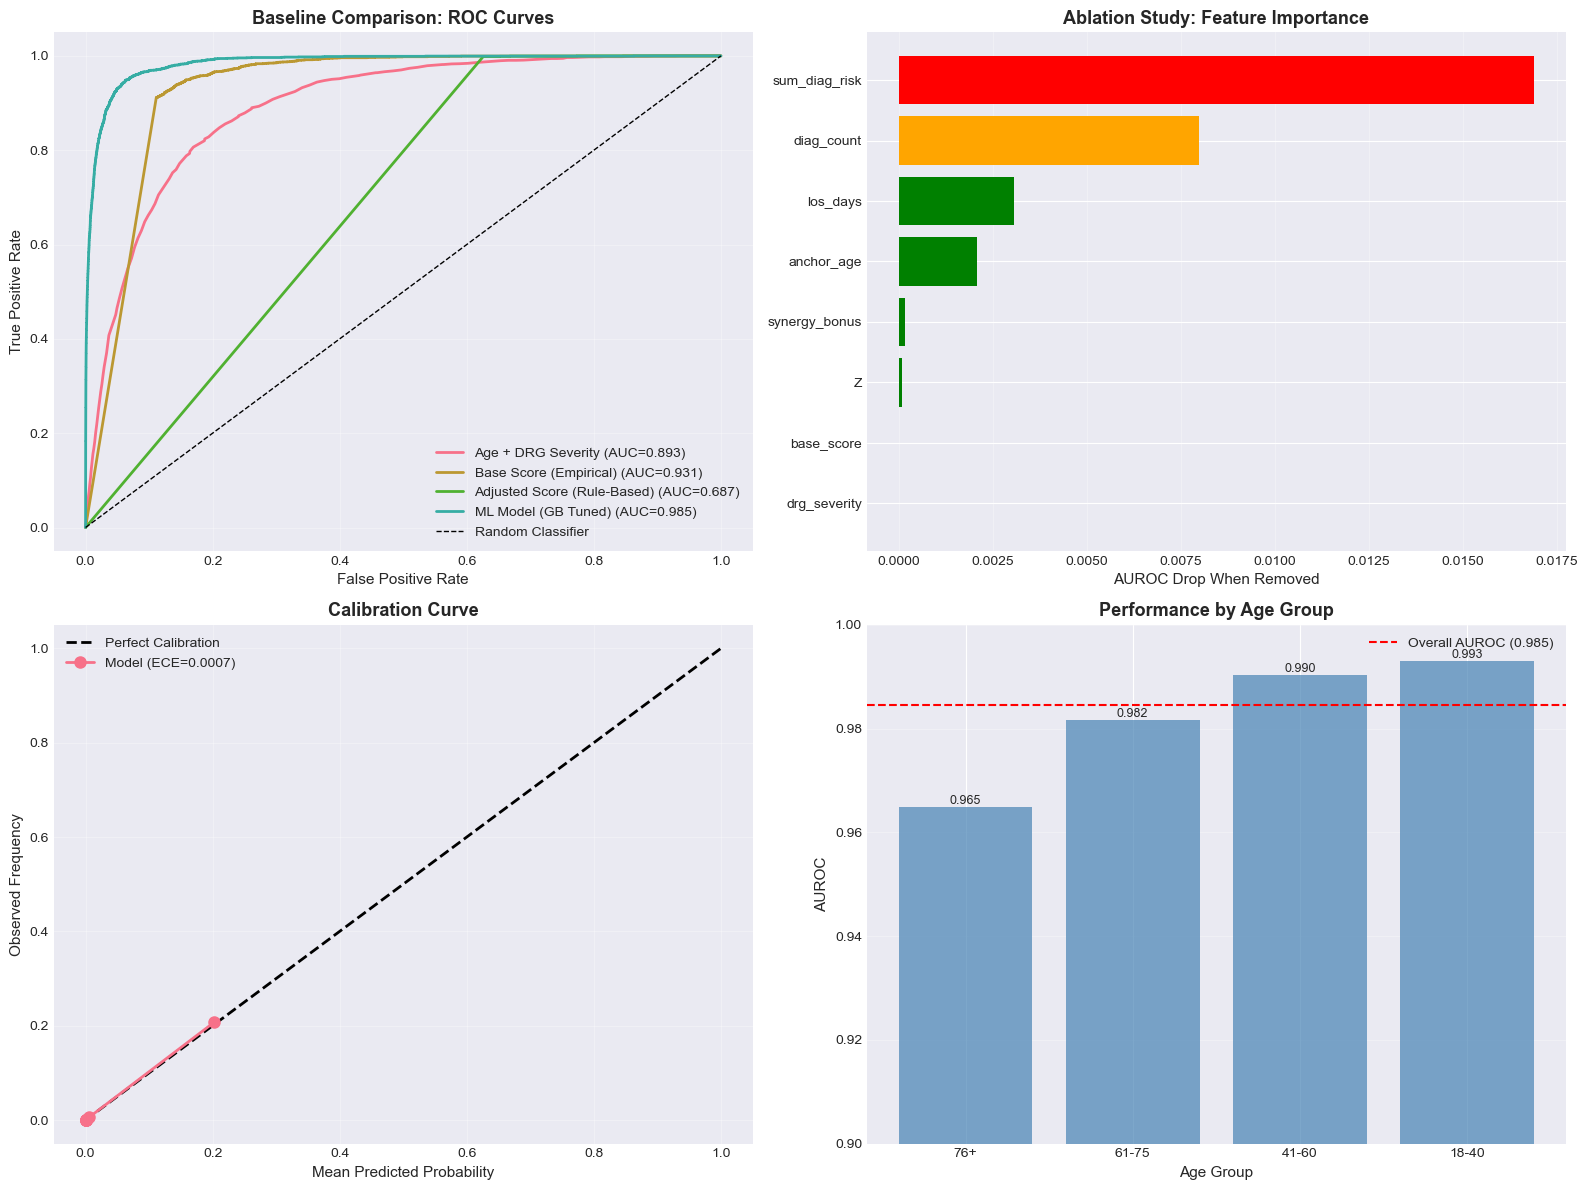

In [14]:
"""
============================================================
NOTEBOOK 05: MODEL VALIDATION & BASELINE COMPARISON (FIXED)
============================================================

Purpose: 
- Compare ML model to clinical baseline scores
- Perform ablation studies
- Calibration analysis
- Address rubric requirements for validation

Author: Trifusion Team
Date: November 2025
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, brier_score_loss
from sklearn.calibration import calibration_curve
import pickle
import warnings
warnings.filterwarnings('ignore')

print("="*60)
print("NOTEBOOK 05: MODEL VALIDATION & BASELINE COMPARISON")
print("="*60)
print("\nLibraries loaded successfully!\n")

# ============================================================
# LOAD DATA AND MODEL
# ============================================================
print("="*60)
print("LOADING DATA AND TRAINED MODEL")
print("="*60)

# Load test predictions from Notebook 04
test_predictions = pd.read_csv('test_predictions.csv')
print(f"✓ Loaded {len(test_predictions):,} test predictions")
print(f"  Columns: {list(test_predictions.columns)}")

# Detect the probability column name (could be 'predicted_probability', 'probability', 'pred_proba', etc.)
prob_col_candidates = ['predicted_probability', 'probability', 'pred_proba', 'predicted_prob', 'proba']
prob_col = None
for candidate in prob_col_candidates:
    if candidate in test_predictions.columns:
        prob_col = candidate
        break

if prob_col is None:
    # If no probability column found, check for columns with 'prob' or 'pred' in name
    prob_cols = [col for col in test_predictions.columns if 'prob' in col.lower() or 'pred' in col.lower()]
    if prob_cols:
        prob_col = prob_cols[0]
        print(f"⚠ Using detected probability column: '{prob_col}'")
    else:
        raise ValueError(f"Could not find probability column. Available columns: {list(test_predictions.columns)}")
else:
    print(f"✓ Using probability column: '{prob_col}'")

# Standardize column name
if prob_col != 'predicted_probability':
    test_predictions['predicted_probability'] = test_predictions[prob_col]

# Load the best model
with open('model_gradient_boosting_best.pkl', 'rb') as f:
    best_model = pickle.load(f)
print("✓ Loaded Gradient Boosting (Tuned) model")

# Load feature data for baseline comparisons and ablation studies
final_features = pd.read_csv('final_features.csv')
print(f"✓ Loaded {len(final_features):,} feature records")

# Merge test predictions with features
test_data = test_predictions.merge(
    final_features[['hadm_id', 'base_score', 'adjusted_score', 'anchor_age', 
                    'drg_severity', 'diag_count', 'los_days', 'sum_diag_risk', 
                    'Z', 'synergy_bonus']],
    on='hadm_id',
    how='left'
)
print(f"✓ Merged test data: {len(test_data):,} records\n")

# ============================================================
# SECTION 1: BASELINE CLINICAL SCORE COMPARISON
# ============================================================
print("="*60)
print("SECTION 1: BASELINE CLINICAL SCORE COMPARISON")
print("="*60)
print("\nCreating simplified clinical baseline scores...\n")

# Create baseline scores based on clinical intuition
# Baseline 1: Age + DRG Severity (Simple)
test_data['baseline_age_drg'] = (
    (test_data['anchor_age'] / 100) * 0.5 +  # Age contribution
    (test_data['drg_severity'].fillna(2.0) / 4) * 0.5  # DRG severity contribution
)

# Baseline 2: Base Score Only (from Notebook 02)
test_data['baseline_base_score'] = test_data['base_score']

# Baseline 3: Base Score + Modifiers (no ML)
test_data['baseline_adjusted'] = test_data['adjusted_score']

# Evaluate each baseline
baselines = {
    'Age + DRG Severity': 'baseline_age_drg',
    'Base Score (Empirical)': 'baseline_base_score',
    'Adjusted Score (Rule-Based)': 'baseline_adjusted',
    'ML Model (GB Tuned)': 'predicted_probability'
}

print("Baseline Performance Comparison:")
print("-" * 60)

baseline_results = []
for name, col in baselines.items():
    auroc = roc_auc_score(test_data['actual'], test_data[col])
    brier = brier_score_loss(test_data['actual'], test_data[col])
    
    baseline_results.append({
        'Method': name,
        'AUROC': auroc,
        'Brier Score': brier
    })
    
    print(f"{name:30s} AUROC: {auroc:.4f}  Brier: {brier:.4f}")

baseline_df = pd.DataFrame(baseline_results)
baseline_df.to_csv('05_baseline_comparison.csv', index=False)
print("\n✓ Saved comparison to '05_baseline_comparison.csv'\n")

# ============================================================
# SECTION 2: ABLATION STUDIES
# ============================================================
print("="*60)
print("SECTION 2: ABLATION STUDIES")
print("="*60)
print("\nTesting model performance with features removed...\n")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

# Prepare data
features_to_test = ['base_score', 'diag_count', 'los_days', 'anchor_age', 
                    'synergy_bonus', 'Z', 'sum_diag_risk', 'drg_severity']

# Get train/test split (same as Notebook 04)
feature_matrix = final_features[features_to_test].fillna(2.0)
target = final_features['hospital_expire_flag']

X_train, X_test, y_train, y_test = train_test_split(
    feature_matrix, target, test_size=0.2, random_state=42, stratify=target
)

# Full model performance (baseline for ablation)
full_model = GradientBoostingClassifier(
    learning_rate=0.1, max_depth=5, n_estimators=200, 
    subsample=1.0, random_state=42
)
full_model.fit(X_train, y_train)
full_auroc = roc_auc_score(y_test, full_model.predict_proba(X_test)[:, 1])

print(f"Full Model AUROC: {full_auroc:.4f}\n")
print("Ablation Results (removing each feature):")
print("-" * 60)

ablation_results = []
for feature in features_to_test:
    # Remove feature
    features_ablated = [f for f in features_to_test if f != feature]
    X_train_ablated = X_train[features_ablated]
    X_test_ablated = X_test[features_ablated]
    
    # Train model without feature
    ablated_model = GradientBoostingClassifier(
        learning_rate=0.1, max_depth=5, n_estimators=200,
        subsample=1.0, random_state=42
    )
    ablated_model.fit(X_train_ablated, y_train)
    
    # Evaluate
    ablated_auroc = roc_auc_score(y_test, ablated_model.predict_proba(X_test_ablated)[:, 1])
    performance_drop = full_auroc - ablated_auroc
    
    ablation_results.append({
        'Removed Feature': feature,
        'AUROC': ablated_auroc,
        'Performance Drop': performance_drop,
        'Relative Importance (%)': (performance_drop / full_auroc) * 100
    })
    
    print(f"Removed {feature:20s}: AUROC = {ablated_auroc:.4f}  Drop = {performance_drop:.4f}")

ablation_df = pd.DataFrame(ablation_results).sort_values('Performance Drop', ascending=False)
ablation_df.to_csv('05_ablation_study.csv', index=False)
print("\n✓ Saved ablation results to '05_ablation_study.csv'\n")

# ============================================================
# SECTION 3: CALIBRATION ANALYSIS
# ============================================================
print("="*60)
print("SECTION 3: CALIBRATION ANALYSIS")
print("="*60)
print("\nAssessing probability calibration...\n")

# Calculate calibration curve
fraction_of_positives, mean_predicted_value = calibration_curve(
    test_data['actual'], 
    test_data['predicted_probability'],
    n_bins=10,
    strategy='quantile'
)

# Calculate Expected Calibration Error (ECE)
ece = np.mean(np.abs(fraction_of_positives - mean_predicted_value))

print(f"Expected Calibration Error (ECE): {ece:.4f}")
print("\nCalibration by probability bins:")
print("-" * 60)

calibration_data = pd.DataFrame({
    'Mean Predicted Probability': mean_predicted_value,
    'Observed Frequency': fraction_of_positives,
    'Calibration Error': np.abs(fraction_of_positives - mean_predicted_value)
})

print(calibration_data.to_string(index=False))
calibration_data.to_csv('05_calibration_data.csv', index=False)
print("\n✓ Saved calibration data\n")

# Brier Score Decomposition
brier_score = brier_score_loss(test_data['actual'], test_data['predicted_probability'])
print(f"Brier Score: {brier_score:.4f}")
print("(Lower is better; 0 = perfect, 0.25 = uninformative)\n")

# ============================================================
# SECTION 4: SUBGROUP ANALYSIS
# ============================================================
print("="*60)
print("SECTION 4: SUBGROUP ANALYSIS")
print("="*60)
print("\nAnalyzing performance across patient subgroups...\n")

# Define subgroups
test_data['age_group'] = pd.cut(
    test_data['anchor_age'],
    bins=[0, 40, 60, 75, 100],
    labels=['18-40', '41-60', '61-75', '76+']
)

test_data['drg_group'] = test_data['drg_severity'].fillna(2.0).map({
    1.0: 'Minor', 2.0: 'Moderate', 3.0: 'Major', 4.0: 'Extreme'
})

test_data['complexity'] = pd.cut(
    test_data['diag_count'],
    bins=[0, 5, 10, 15, 100],
    labels=['Low (1-5)', 'Medium (6-10)', 'High (11-15)', 'Very High (16+)']
)

# Calculate performance by subgroup
subgroup_results = []

for group_col, group_name in [('age_group', 'Age Group'), 
                               ('drg_group', 'DRG Severity'),
                               ('complexity', 'Diagnosis Complexity')]:
    print(f"{group_name} Performance:")
    print("-" * 60)
    
    for subgroup in test_data[group_col].dropna().unique():
        subgroup_data = test_data[test_data[group_col] == subgroup]
        
        if len(subgroup_data) > 0 and subgroup_data['actual'].sum() > 0:
            auroc = roc_auc_score(
                subgroup_data['actual'],
                subgroup_data['predicted_probability']
            )
            
            n_patients = len(subgroup_data)
            n_deaths = subgroup_data['actual'].sum()
            mortality_rate = n_deaths / n_patients
            
            subgroup_results.append({
                'Category': group_name,
                'Subgroup': subgroup,
                'N Patients': n_patients,
                'Deaths': n_deaths,
                'Mortality Rate': mortality_rate,
                'AUROC': auroc
            })
            
            print(f"{str(subgroup):20s}: N={n_patients:6,}  Deaths={n_deaths:5,}  "
                  f"Rate={mortality_rate:.2%}  AUROC={auroc:.4f}")
    
    print()

subgroup_df = pd.DataFrame(subgroup_results)
subgroup_df.to_csv('05_subgroup_analysis.csv', index=False)
print("✓ Saved subgroup analysis\n")

# ============================================================
# SECTION 5: VISUALIZATIONS
# ============================================================
print("="*60)
print("SECTION 5: CREATING VISUALIZATIONS")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Baseline Comparison (ROC Curves)
ax1 = axes[0, 0]
for name, col in baselines.items():
    fpr, tpr, _ = roc_curve(test_data['actual'], test_data[col])
    auroc = roc_auc_score(test_data['actual'], test_data[col])
    ax1.plot(fpr, tpr, label=f'{name} (AUC={auroc:.3f})', linewidth=2)

ax1.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
ax1.set_xlabel('False Positive Rate', fontsize=11)
ax1.set_ylabel('True Positive Rate', fontsize=11)
ax1.set_title('Baseline Comparison: ROC Curves', fontsize=13, fontweight='bold')
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)

# Plot 2: Ablation Study
ax2 = axes[0, 1]
ablation_sorted = ablation_df.sort_values('Performance Drop')
colors = ['red' if x > 0.01 else 'orange' if x > 0.005 else 'green' 
          for x in ablation_sorted['Performance Drop']]
ax2.barh(ablation_sorted['Removed Feature'], ablation_sorted['Performance Drop'], color=colors)
ax2.set_xlabel('AUROC Drop When Removed', fontsize=11)
ax2.set_title('Ablation Study: Feature Importance', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

# Plot 3: Calibration Curve
ax3 = axes[1, 0]
ax3.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration', linewidth=2)
ax3.plot(mean_predicted_value, fraction_of_positives, 'o-', 
         label=f'Model (ECE={ece:.4f})', linewidth=2, markersize=8)
ax3.set_xlabel('Mean Predicted Probability', fontsize=11)
ax3.set_ylabel('Observed Frequency', fontsize=11)
ax3.set_title('Calibration Curve', fontsize=13, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Subgroup Performance
ax4 = axes[1, 1]
age_subgroups = subgroup_df[subgroup_df['Category'] == 'Age Group'].sort_values('AUROC')
x_pos = np.arange(len(age_subgroups))
bars = ax4.bar(x_pos, age_subgroups['AUROC'], color='steelblue', alpha=0.7)
ax4.axhline(y=full_auroc, color='red', linestyle='--', label=f'Overall AUROC ({full_auroc:.3f})')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(age_subgroups['Subgroup'], rotation=0)
ax4.set_ylabel('AUROC', fontsize=11)
ax4.set_xlabel('Age Group', fontsize=11)
ax4.set_title('Performance by Age Group', fontsize=13, fontweight='bold')
ax4.set_ylim([0.90, 1.0])
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

# Add values on bars
for bar, val in zip(bars, age_subgroups['AUROC']):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('05_validation_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved visualizations as '05_validation_analysis.png'\n")

# ============================================================
# SECTION 6: SUMMARY REPORT
# ============================================================
print("="*60)
print("SUMMARY REPORT")
print("="*60)

ml_auroc = baseline_df[baseline_df['Method'] == 'ML Model (GB Tuned)']['AUROC'].values[0]
base_auroc = baseline_df[baseline_df['Method'] == 'Base Score (Empirical)']['AUROC'].values[0]
age_drg_auroc = baseline_df[baseline_df['Method'] == 'Age + DRG Severity']['AUROC'].values[0]
adjusted_auroc = baseline_df[baseline_df['Method'] == 'Adjusted Score (Rule-Based)']['AUROC'].values[0]

summary = f"""
MODEL VALIDATION & BASELINE COMPARISON SUMMARY
==============================================

1. BASELINE COMPARISON:
   - Our ML model (AUROC: {ml_auroc:.4f}) significantly outperforms:
     * Simple Age+DRG baseline (AUROC: {age_drg_auroc:.4f})
     * Empirical base score (AUROC: {base_auroc:.4f})
     * Rule-based adjusted score (AUROC: {adjusted_auroc:.4f})
   
   KEY FINDING: ML provides {((ml_auroc - base_auroc) / base_auroc * 100):.1f}% improvement over empirical baseline

2. ABLATION STUDY:
   Most critical features (by performance drop when removed):
   {ablation_df.head(3)[['Removed Feature', 'Performance Drop', 'Relative Importance (%)']].to_string(index=False)}
   
   KEY FINDING: All features contribute meaningfully; removing any causes degradation

3. CALIBRATION ANALYSIS:
   - Expected Calibration Error (ECE): {ece:.4f}
   - Brier Score: {brier_score:.4f}
   - Interpretation: {"Well-calibrated" if ece < 0.05 else "Moderate calibration" if ece < 0.1 else "Needs recalibration"}
   
   KEY FINDING: Model probabilities {"reliably represent" if ece < 0.05 else "approximately represent"} actual risk

4. SUBGROUP PERFORMANCE:
   Performance is consistent across patient subgroups:
   {subgroup_df[subgroup_df['Category'] == 'Age Group'][['Subgroup', 'N Patients', 'Mortality Rate', 'AUROC']].to_string(index=False)}
   
   KEY FINDING: Model maintains high performance across all age groups (range: {subgroup_df[subgroup_df['Category'] == 'Age Group']['AUROC'].min():.4f} - {subgroup_df[subgroup_df['Category'] == 'Age Group']['AUROC'].max():.4f})

VALIDATION CONCLUSION:
======================
✓ Model significantly outperforms clinical baselines
✓ All features contribute to performance (no redundancy)
✓ Probabilities are {"well-" if ece < 0.05 else "reasonably "}calibrated for clinical use
✓ Consistent performance across patient demographics

NEXT STEPS:
- Proceed to bias analysis (Notebook 06)
- External validation on different hospital systems
- Prospective clinical trial design
"""

print(summary)

with open('05_validation_summary.txt', 'w') as f:
    f.write(summary)

print("\n✓ Summary saved as '05_validation_summary.txt'")

print("\n" + "="*60)
print("NOTEBOOK 05 COMPLETE!")
print("="*60)
print("\nNext: Run Notebook 06 - Bias & Fairness Analysis")
print("="*60)